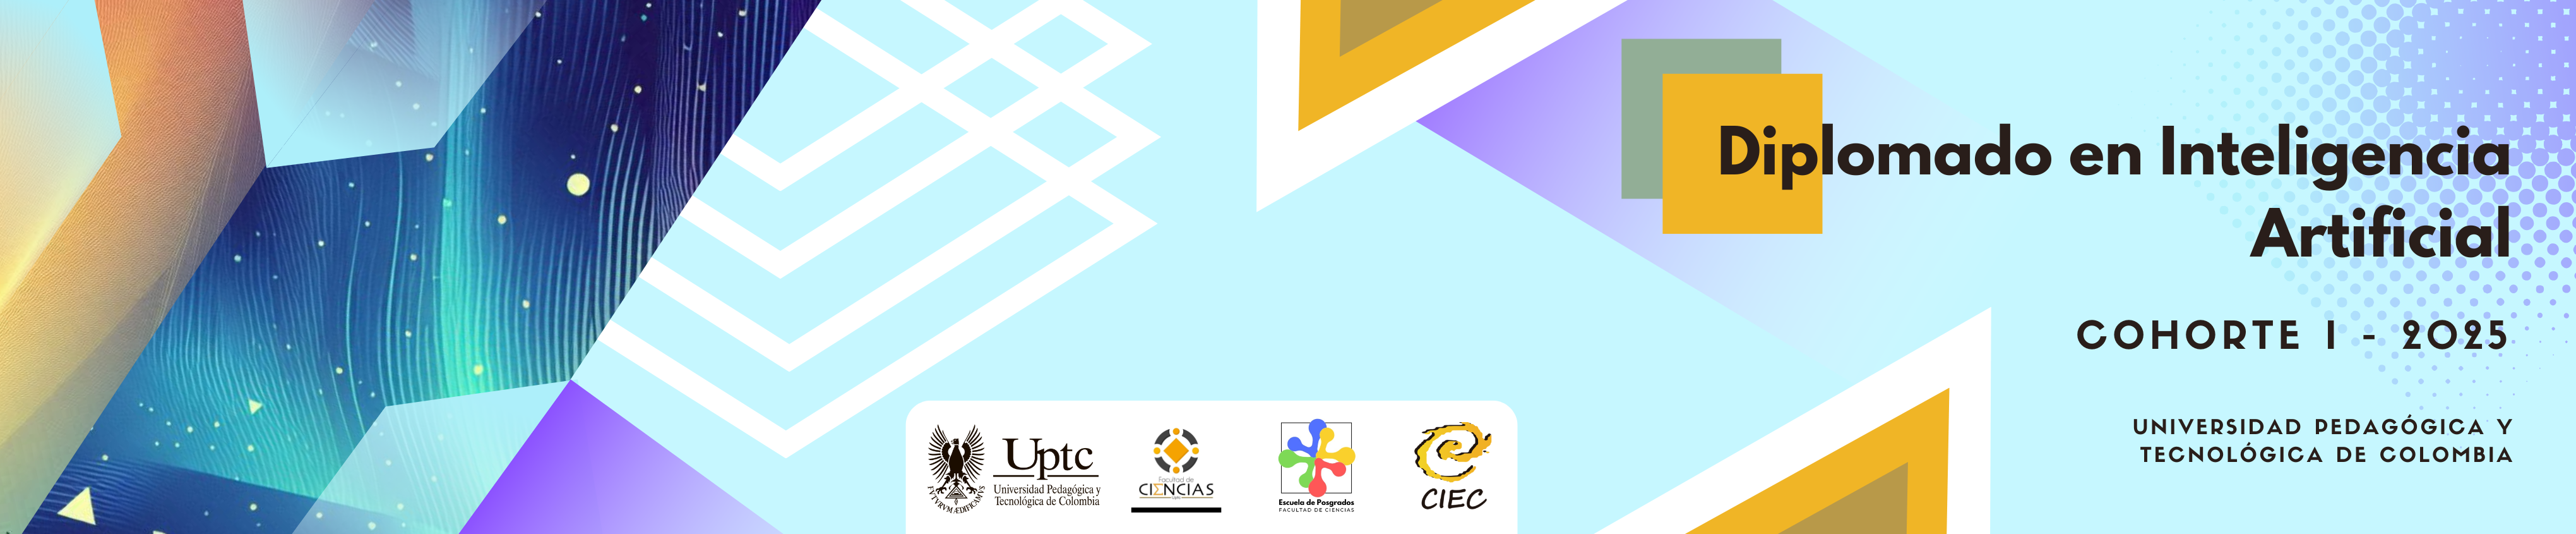

<!-- Main Title -->

**<h1 style="color: #f0b526; text-align: center;"> EDA Módulo III: Manejo de Valores Nulos y Preprocesamiento </h1>**

---

**<h2 style="color: rgb(71, 207, 228);">Autores</h2>**

- [Nicolás Castillo Ojeda](https://www.linkedin.com/in/nicolas-castillo-ak/)

---

**<h2 style="color: rgb(71, 207, 228);">Introducción</h2>**

Bienvenido al segundo proyecto guiado del curso de "*Análisis Exploratorio de Datos (Exploratory Data Analysis - EDA)*". Durante este proyecto, nos enfocarémos no solo en emplear las herramientas estadísticas y visuales vístas en clases anteriores referentes al proceso EDA sino que a demás, aprenderemos diferentes técnicas de detección e imputación de valores nulos dentro de un conjunto de datos. En adición a lo anterior, realizaremos una serie de procedimientos de preprocesamiento de los datos dentro de los cuáles encontramos los siguientes.

*  Numerización de variables categóricas
*  Imputación de valores nulos 
*  Validación estadística de la inputación de valores
*  Balanceamiento de datos categóricos por oversampling y subsampling


---

**<h2 style="color: rgb(71, 207, 228);">Dependencias</h2>**

### <!-- Subsection 00 -->
**<h3 id="subsection00" style="color: rgb(42, 100, 109);">Librerías principales</h3>**

In [89]:
# Propósito general
import warnings
warnings.simplefilter(action='ignore')

# Manejo de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
import missingno
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import scipy.stats as sts
from scipy.stats import ks_2samp
from imblearn.over_sampling import SMOTE

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PolynomialFeatures

### <!-- Subsection 01 -->
**<h3 id="subsection01" style="color: rgb(42, 100, 109);">Utilerias</h3>**

In [90]:
# Utilidades
import os
import sys

# Directorio actual
current_dir = os.getcwd()

# Directorio padre
utils_dir = os.path.join(current_dir, 'utils')
sys.path.append(utils_dir)

# importación de graficadores
from utils import *
from pandas_missing_extension import *

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <!-- Section 1 -->
**<h2 id="section1" style="color: rgb(71, 207, 228);">1. Importación de datos</h2>**

### <!-- Subsection 1.1 -->
**<h3 id="subsection11" style="color: rgb(42, 100, 109);">1.1. Importación y descripción de los datos</h3>**

---
Importación y descripción de los datos

---

El diccionario de los datos es el siguiente:

|Variable|Descripción|Tipología|
|---|---|---|
|PH| Indicador el estado ácido o alcalino del agua. Límite máximo permitido por la OMS es de 6.5 a 8.5|numérica|
|Dureza|Cantidad de sales de calcio y magnecio.|numérica|
|Sólidos|Sólidos totales disueltos (TDS). Es el parámetro más importante para el uso del agua, un alto valor indica alta mineralización. El límite deseable de TDS es de 500 mg/l y el límite máximo es de 1000 mg/l.|numérica|
|Cloraminas|Niveles de cloro y cloramina en el agua. Los valores hasta 4 miligramos por litro (4 partes por millón (ppm)) se consideran seguros en el agua potable.|numérica|
|Sulfatos|Niveles de sulfato, en la mayoría de los suministros de agua dulce, oscila entre 3 y 30 mg/l.|numérico|
|Coductividad|Concentración iónica en el agua determinada por la cantidad de sólidos disueltos en el agua. La CE (Conductividad Eléctrica) no debe superar los 400 micS/cm|numérico|
|Carbono_organico|Carbono Orgánico Total (COT), es la cantidad total de compuestos de carbono orgánico en el agua pura. |numérico|
|Trihalometanos|Los Trihalometanos (THM) son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM de hasta 80 ppm se considera seguros en el agua potable.|numérico|
|Turbidez|De pende de la cantidad de materia sólida presente en estado de suspensión. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad de los vertidos con respecto a la materia coloidal.  El valor medio de turbidez obtenido para el Campus Wondo Gener es de 0.98 NTU e inferior al recomendado por la OMS dado por 5.00 NTU|categórica|


In [4]:
# Importación de los datos
path = 'https://raw.githubusercontent.com/AsorKy/Datasets/main/water_data.xlsx'
df_raw = pd.read_excel(path, sheet_name='in')
print('Dimensiones de los datos=', df_raw.shape)

Dimensiones de los datos= (3276, 10)


In [5]:
# Vista preliminar de los datos
df_raw.head()

pH  Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0   NaN  204.89  20791.32        7.30    368.52         564.31   
1  3.72  129.42  18630.06        6.64       NaN         592.89   
2  8.10  224.24  19909.54        9.28       NaN         418.61   
3  8.32  214.37  22018.42        8.06    356.89         363.27   
4  9.09  181.10  17978.99        6.55    310.14         398.41   

   Carbono_orgánico  Trihalometanos  Turbidez Potabilidad  
0             10.38           86.99      2.96          NO  
1             15.18           56.33      4.50          NO  
2             16.87           66.42      3.06          NO  
3             18.44          100.34      4.63          NO  
4             11.56           32.00      4.08          NO

Descripción de las variables del dataset.

In [12]:
# Tipos de variables en el dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pH                2785 non-null   float64
 1   Dureza            3276 non-null   float64
 2   Sólidos           3276 non-null   float64
 3   Cloraminas        3276 non-null   float64
 4   Sulfatos          2495 non-null   float64
 5   Conductividad     3276 non-null   float64
 6   Carbono_orgánico  3276 non-null   float64
 7   Trihalometanos    3114 non-null   float64
 8   Turbidez          3276 non-null   float64
 9   Potabilidad       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


La información anterior, nos permite reconocer que de las diez variables que conformal al dataset, nueve de ellas son de tipo numérico y solo una, la potabilidad, es de tipo categórico.

# <!-- Section 1 -->
**<h2 id="section1" style="color: rgb(71, 207, 228);">2. Análisis Exploratorio de Datos  (EDA)</h2>**

### <!-- Subsection 2.1 -->
**<h3 id="subsection21" style="color: rgb(42, 100, 109);">2.1. Detección de valores nulos y duplicados</h3>**

---
Detección de valores nulos y duplicados

---


Una vez nos hemos asegurado que la carga de los datos ha sido exitosa y no parece haber errores de formato aparentes, procedemos a explorar los datos mediante visualizaciones y estadísticos principales. Para empezar, observemos la estadística descriptiva básica de nuestros datos numéricos y categóricos.

In [7]:
# Descripción estadística inicial de los datos numéricos
df = df_raw.copy()
df.describe()

pH       Dureza       Sólidos   Cloraminas     Sulfatos  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080804   196.369481  22014.092415     7.122241   333.775784   
std       1.594369    32.879680   8768.570852     1.583143    41.416864   
min       0.000000    47.430000    320.940000     0.350000   129.000000   
25%       6.090000   176.847500  15666.687500     6.130000   307.695000   
50%       7.040000   196.965000  20927.830000     7.130000   333.070000   
75%       8.060000   216.670000  27332.760000     8.112500   359.950000   
max      14.000000   323.120000  61227.200000    13.130000   481.030000   

       Conductividad  Carbono_orgánico  Trihalometanos     Turbidez  
count    3276.000000       3276.000000     3114.000000  3276.000000  
mean      426.205171         14.284921       66.396281     3.966731  
std        80.824123          3.308232       16.174983     0.780354  
min       181.480000          2.200000        0.740000     1.450000  
25%       365.735000         12.070000       55.847500     3.440000  
50%       421.885000         14.220000       66.620000     3.955000  
75%       481.790000         16.560000       77.337500     4.500000  
max       753.340000         28.300000      124.000000     6.740000

De los estadísticos principales podemos observar:
* Gracias a que la cantidad de regístros es 3276, y a que vemos que variables como el pH solo regístran 2785 regístros, empezamos a intuir que exísten valores faltantes dentro de nuestro conjunto de datos.

* En promedio, el pH de las muestras tomadas se encuentran dentro del rango aceptado  (6.5 - 8.5), no obstante, vemos que métricas como el Q3 y el valor máximo, se encuentran muy por encima de lo considerado como potable. Así pues, solo hasta el Q2 (mediana) de las muestras se encuentran dentro del rango potable.

* En promedio, los valores de sólidos se encuentran muy por encima (el doble) de lo considerado como aceptable. Vemos que en general las muéstras de agua contienen altos contenidos de sólidos ya que incluso desde el Q1, todos los valores de los cuartiles superan el rango aceptado, el cuál, según el diccionario de los datos, se encuentra entre 500 mg/l y 1000 mg/l.

* En general, tanto el valor promedio como los los tres cuartiles del nivel de cloraminas se encuentra muy por encima de lo aceptado, el cuál según el diccionario de los datos, corresponde a 4ppm.

* En general, tanto el valor promedio como los los tres cuartiles del nivel de sulfatos se encuentra muy por encima de lo aceptado, el cuál según el diccionario de los datos, corresponde a 30 mg/l.

* En cuanto a la Conductividad, el promedio se encuentra un poco por encima de lo aceptado como potable, y en general, los datos contienen una alta conductividad. Esto se evidencia ya que solo hasta el Q1 los datos poseen un valor de conductividad aceptable.

* En general, los Trihalometanos se encuentran por debajo del límite el cuál según el diccionario de los datos, corresponde a 80 ppm. Podemos evidenciarlo a partir de los estadísticos principales ya que tanto el promedio, como los datos hasta el Q3 se encuentran por debajo del límite.

* Con respecto a la turbidez, en general los datos se encuentran dentro del rango permitído por la OMS (5 NTU) pero solo hasta antes del Q1, los datos poseen el nivel de turbidez aceptable según el CWG.


Una vez hemos estudiado de manera general los datos numéricos, el análisis inicial de los datos categóricos nos dice que los datos no están balanceados y que es la categoría ```NO``` es la clasificación de potabilidad predominante. Conclusión que es tambíen deducida a partir de los estadísticos principales de las variables numéricas. Esto nos dice que solo el 60% de los datos registrados corresponden a muestras de aguas NO potables.



In [7]:
# Descripción estadística inicial de datos categóricos
df.describe(include='object')

Potabilidad
count         3276
unique           2
top             NO
freq          1998

No obstante, ¿estas observaciones iniciales son acertadas?. Para contestar ésta pregunta, tenemos que determinar si dentro del dataset exísten valores nulos por columna para descartar la posibilidad de que nuestras observaciones estén sesgadas debido a la presencia de valores ausentes.


In [8]:
# Número de valores nulos por columna
tot = len(df)
nulos = (df.isnull().sum()/tot) * 100
nulos_num = (df.isnull().sum()) 
nulidad = pd.DataFrame({'Variable': nulos.index, 'Porcentaje de nulidad':nulos.values, 'Cantidad de nulos':nulos_num.values})
nulidad.sort_values(by='Porcentaje de nulidad', ascending=False)

Variable  Porcentaje de nulidad  Cantidad de nulos
4          Sulfatos              23.840049                781
0                pH              14.987790                491
7    Trihalometanos               4.945055                162
1            Dureza               0.000000                  0
2           Sólidos               0.000000                  0
3        Cloraminas               0.000000                  0
5     Conductividad               0.000000                  0
6  Carbono_orgánico               0.000000                  0
8          Turbidez               0.000000                  0
9       Potabilidad               0.000000                  0

Al encontrar el número de valores nulos y determinar el porcentaje de nulidad (porcentaje de datos nulos), vemos que tenemos tres variables con presencia de valores nulos, donde de mayor a menor cantidad de nulidad se tiene las siguientes variables:

1. Sulfatos
2. pH
3. Trihalometanos

Dentro del conocimiento del autor del presente proyecto, es conocido que humbrales tales como 30% y 40% de nulidad son suficientes para considerar descartar una variable según el contexto del problema en cuestión. Con base a esto, ya que todas las variables con valores nulos no sobrepasan el humbral del 30%, conservaremos todas las variables problemáticas y procederemos más adelante a emplear técnicas de imputación de datos.

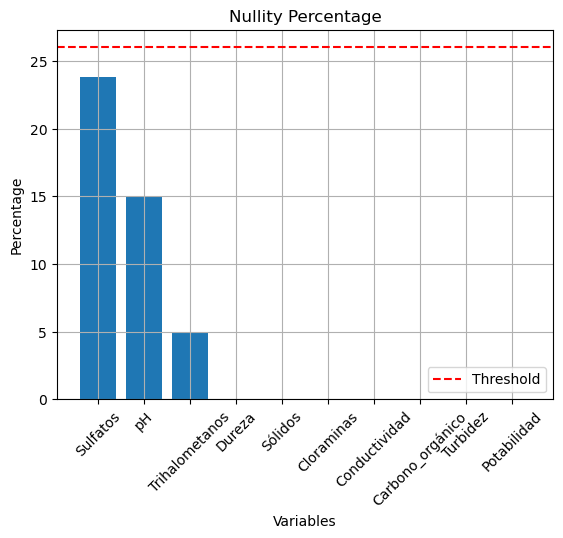

In [42]:
# Plot de porcentaje de nulidad
nullity_plot(df, threshold=26)

Ahora, procedemos a responder la pregunta ¿exíste un número importante de duplicados?. La respuesta a esta pregunta es NO exísten regístros duplicados dentro de nuestros datos.

In [25]:
# Numero de duplicados
n_duplicados = df.duplicated().sum()
porcentaje_duplicados = (n_duplicados / df.shape[0]) *100
print('El número de duplicados es = ', n_duplicados)
print('Porcentaje de duplicados es =', porcentaje_duplicados)

El número de duplicados es =  0
Porcentaje de duplicados es = 0.0


### <!-- Subsection 2.2 -->
**<h3 id="subsection22" style="color: rgb(42, 100, 109);">2.2. Preprocesamiento de los datos</h3>**

##### <!-- Subsection 2.2.1 -->
**<h3 id="subsection221" style="color: rgb(42, 100, 109);">2.2.1. Transformación de variables categóricas</h3>**

---
Transformación de variables categóricas

---

Antes de realizar la imputación de los datos, es necesrio convertir las variables categóricas a numéricas. Para ello, emplearemos la estrategia one-hot-encoder ya que la ventaja de esta transformación es que no establece una jerarquía implicita a la conversión como si ocurre en el OrdinalEncoder. A demás, este acercamiento es apropiado debido a que solo necesitamos convertir una sola variable categórica binaria, lo que significa que al realizar la transformación OneHot no agregaríamos ninguna dimensión extra a nuestros datos ni una relación ordinal, ya que al ser Potabilidad una variable categórica binaria, bastaría con realizar la transformación `SI -> 1` y `NO -> 0`.

In [8]:
# One hot encoder
df_enc = df.copy()
df_enc['Potabilidad'] = df_enc['Potabilidad'].map({'SI':1,'NO':0})
df_enc.head()

pH  Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0   NaN  204.89  20791.32        7.30    368.52         564.31   
1  3.72  129.42  18630.06        6.64       NaN         592.89   
2  8.10  224.24  19909.54        9.28       NaN         418.61   
3  8.32  214.37  22018.42        8.06    356.89         363.27   
4  9.09  181.10  17978.99        6.55    310.14         398.41   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad  
0             10.38           86.99      2.96            0  
1             15.18           56.33      4.50            0  
2             16.87           66.42      3.06            0  
3             18.44          100.34      4.63            0  
4             11.56           32.00      4.08            0

Dentro de las técnicas de numerización de datos encontramos entonces dos acercamientos principales, **One-Hot Encoding** y **Ordinal Encoding**.

##### **One-Hot Encoding**

El **One-Hot Encoding** es una técnica que convierte una variable **categórica nominal** en un conjunto de variables binarias. Cada categoría única de la variable original se representa como una nueva columna, que toma el valor de 1 si la observación pertenece a esa categoría y 0 si no. Por ejemplo, si suponemos que exíste una variable categórica "Color" con los valores `["Rojo", "Verde", "Azul"]`. Después de aplicar One-Hot Encoding, se generarán tres columnas: una para "Rojo", otra para "Verde", y otra para "Azul".

| Color   | Rojo | Verde | Azul |
|---------|------|-------|------|
| Rojo    |  1   |   0   |  0   |
| Verde   |  0   |   1   |  0   |
| Azul    |  0   |   0   |  1   |

Algunas de sus ventajas son:

1. **No introduce relaciones de orden**: A diferencia del ordinal encoding, One-Hot Encoding no implica ninguna relación jerárquica entre las categorías, lo cual es adecuado para datos categóricos nominales (sin orden natural).
2. **Fácil de interpretar**: Cada columna representa de manera clara si una observación pertenece a una categoría específica.
3. **Adecuado para algoritmos basados en distancias**: En algoritmos como **K-Nearest Neighbors** y **KMeans**, donde las distancias o las similitudes entre las características son importantes, el One-Hot Encoding evita que las diferencias numéricas falsas (debido al orden) afecten los cálculos.

algúnas de sus desventajas son:
1. **Incremento dimensional**: Si una variable categórica tiene muchas categorías, el número de columnas en el dataset puede aumentar de manera significativa. Esto lleva al **problema de la alta dimensionalidad**, que puede hacer que los modelos sean más lentos y difíciles de interpretar.
2. **Redundancia**: Para $n$ categorías, se generan n nuevas columnas. Sin embargo, esto genera redundancia porque solo $n-1$ columnas son necesarias para representar la información. Una categoría puede deducirse de las demás.



##### **Ordinal Encoding**

El **Ordinal Encoding** es una técnica que asigna un valor numérico entero a cada categoría de una **variable ordinal**. Aquí, las categorías se representan por un número basado en su posición en un orden predefinido. Este método es adecuado solo para datos ordinales, donde las categorías tienen un orden o jerarquía natural. Por ejemplo, si tenemos una variable categórica "Tamaño" con valores `["Pequeño", "Mediano", "Grande"]`, se puede asignar el valor 1 a "Pequeño", el valor 2 a "Mediano", y el valor 3 a "Grande".

| Tamaño   | Valor |
|----------|-------|
| Pequeño  |   1   |
| Mediano  |   2   |
| Grande   |   3   |

Algúnas de sus ventajas son:

1. **Eficiencia en almacenamiento**: En comparación con el One-Hot Encoding, el Ordinal Encoding no aumenta la dimensionalidad, ya que solo añade una columna por cada variable categórica.
2. **Representa un orden natural**: Este método es perfecto para variables ordinales donde las categorías tienen un significado en cuanto a orden (p. ej., calificaciones de satisfacción, niveles de educación, etc).

Algúnas de sus desventajas son:

1. **Introduce una relación de orden**: Si las categorías no tienen un orden inherente, como ocurre con las variables nominales, el Ordinal Encoding puede introducir falsas relaciones jerárquicas entre las categorías, lo que puede sesgar los resultados del modelo.
2. **Inadecuado para algoritmos basados en distancia**: Algoritmos como **K-NN** o **regresión lineal** pueden malinterpretar las diferencias numéricas como distancias significativas entre categorías, lo que podría llevar a un rendimiento pobre.

#### **Casos oportunos de uso**:
- **Variables ordinales**: Cuando las categorías tienen un orden natural (p. ej., calificación de productos: "Bajo", "Medio", "Alto").
- **Modelos de regresión o árboles de decisión**: Algoritmos que no dependen de distancias pueden utilizar Ordinal Encoding sin problemas, siempre que las categorías sean ordenadas.

##### **Comparación de One-Hot Encoding y Ordinal Encoding**

| Característica          | One-Hot Encoding                                   | Ordinal Encoding                                |
|-------------------------|----------------------------------------------------|-------------------------------------------------|
| **Tipo de variable**     | Nominal (sin orden)                               | Ordinal (con orden)                             |
| **Dimensionalidad**      | Incrementa el número de columnas (nueva columna por cada categoría) | Mantiene la dimensionalidad (una columna por variable) |
| **Relación entre categorías** | No introduce relaciones de orden                  | Introduce una relación de orden (puede ser falsa) |
| **Impacto en modelos**   | Adecuado para algoritmos basados en distancia y regresión | Puede sesgar modelos basados en distancia si las categorías no tienen un orden real |
| **Escalabilidad**        | Se vuelve ineficiente con muchas categorías        | Escalable, pero solo útil si hay un orden claro |

Se emplea un acercamiento One-Hot Encoding cuando:
- Cuando las categorías no tienen un orden natural.
- Cuando se utilizan modelos sensibles a las magnitudes y distancias, como **SVM**, **K-NN**, y **regresión logística**.
- Si hay pocas categorías y no se espera un gran aumento en la dimensionalidad.

Se emplea un acercamiento  Ordinal Encoding cuando:
- Cuando las categorías tienen un orden natural.
- Para variables que representen clasificaciones o niveles de progresión (e.g., encuestas de satisfacción).
- En algoritmos que no son sensibles a la distancia entre valores numéricos, como **árboles de decisión** y **bosques aleatorios**.



In [10]:
# Ejemplo de codificación Dummy

# Creamos un DataFrame de ejemplo
data = {
    'Color': ['Rojo', 'Verde', 'Azul', 'Verde', 'Rojo'],
    'Tamaño': ['Pequeño', 'Grande', 'Pequeño', 'Mediano', 'Grande']
}

df_ex = pd.DataFrame(data)

# Aplicamos codificación dummy
df_dummy = pd.get_dummies(df_ex , columns=['Color'], drop_first=False)*1
df_dummy

Tamaño  Color_Azul  Color_Rojo  Color_Verde
0  Pequeño           0           1            0
1   Grande           0           0            1
2  Pequeño           1           0            0
3  Mediano           0           0            1
4   Grande           0           1            0

In [11]:
# Importación de  un codificador one-hot
from sklearn.preprocessing import OneHotEncoder

# Creamos un DataFrame de ejemplo
data = {
    'Color': ['Rojo', 'Verde', 'Azul', 'Verde', 'Rojo'],
    'Tamaño': ['Pequeño', 'Grande', 'Pequeño', 'Mediano', 'Grande']
}

df_ex  = pd.DataFrame(data)

# Inicializamos el codificador OneHotEncoder
encoder = OneHotEncoder()

# Aplicamos la codificación One-Hot (convertimos la matriz dispersa a densa con .toarray())
one_hot_encoded = encoder.fit_transform(df_ex [['Color']]).toarray()

# Creamos un nuevo DataFrame con las columnas codificadas
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Color']))

# Concatenamos el DataFrame original con el DataFrame codificado
df_one_hot = pd.concat([df_ex , one_hot_df], axis=1).drop('Color', axis=1)

# Mostrar el resultado
df_one_hot

Tamaño  Color_Azul  Color_Rojo  Color_Verde
0  Pequeño         0.0         1.0          0.0
1   Grande         0.0         0.0          1.0
2  Pequeño         1.0         0.0          0.0
3  Mediano         0.0         0.0          1.0
4   Grande         0.0         1.0          0.0

In [32]:
df_ex['Tamaño']

0    Pequeño
1     Grande
2    Mediano
3     Grande
4    Pequeño
Name: Tamaño, dtype: object

In [12]:
# Importación de  un codificador ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Creamos un DataFrame de ejemplo
data = {
    'Tamaño': ['Pequeño', 'Grande', 'Mediano', 'Grande', 'Pequeño']
}

df_ex  = pd.DataFrame(data)

# Inicializamos el codificador OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Pequeño', 'Mediano', 'Grande']])

# Aplicamos la codificación ordinal
df_ex ['Tamaño_Codificado'] = ordinal_encoder.fit_transform(df_ex[['Tamaño']])
df_ex

Tamaño  Tamaño_Codificado
0  Pequeño                0.0
1   Grande                2.0
2  Mediano                1.0
3   Grande                2.0
4  Pequeño                0.0

##### <!-- Subsection 2.2.2 -->
**<h3 id="subsection2212" style="color: rgb(42, 100, 109);">2.2.2. Imputación de valores nulos</h3>**

---
Mecanísmos de nulidad

---

Los valores nulos en un conjunto de datos pueden aparecer debido a diferentes mecanismos y razones, debido a ésto, los métodos de imputación adecuados dependen del mecanismo que generó los valores faltantes ya que realizar imputaciones sin entender que mecanismo de nulidad está operando puede generar sesgos en el comportamiento natural de los datos. A continuación, se describen los mecanismos y los métodos de imputación posibles:

**1. MECANISMOS DE VALORES NULOS**

**a. Missing Completely at Random (MCAR)**  
- Los valores faltantes no están relacionados con ninguna variable en el conjunto de datos, ni con la variable que contiene el valor faltante.
- Ejemplo: Pérdida de datos completamente al azar debido a un error técnico.

**Implicación:** Los datos faltantes no introducen sesgo y son **representativos del conjunto de datos completo**. Esto quiere decir que incluso considerar la deleción de los regístro es una opción plausible.


**b. Missing at Random (MAR)**  
- Los valores faltantes están relacionados con otras variables observadas, pero no con la propia variable que tiene los valores faltantes.
- Ejemplo: Los ingresos de un encuestado están ausentes, pero esta ausencia depende de su nivel de educación registrado en otra variable.

**Implicación:** Se puede usar información de otras variables para predecir y llenar los valores faltantes.


**c. Missing Not at Random (MNAR)**  
- Los valores faltantes están relacionados con la propia variable faltante, o su ausencia no es aleatoria.
- Ejemplo: Las personas con ingresos altos no informan sus ingresos por razones de privacidad.

**Implicación:** Este mecanismo introduce sesgo, y los métodos de imputación requieren supuestos adicionales o conocimiento externo.


**2. MÉTODOS DE IMPUTACIÓN SEGÚN EL MECANISMO DE NULIDAD**

**a. Para MCAR**
- **Eliminación de filas/columnas:**
  - Si la cantidad de valores nulos es pequeña y no afecta significativamente el análisis.
  - Ejemplo: `df.dropna()`.
- **Imputación con una constante:**
  - Rellenar con un valor fijo como 0 o la media.
  - Ejemplo: `df.fillna(0)`.
- **Imputación con la media/mediana/moda:**
  - Promedio o tendencia central de la variable.
  - Ejemplo: `df['col'].fillna(df['col'].mean())`.


**b. Para MAR**
- **Imputación basada en KNN:**
  - Usa similitudes entre observaciones para imputar valores.
  - Ejemplo: `KNNImputer` de `sklearn`.
- **Regresión:**
  - Usar regresión para predecir valores faltantes basándose en otras variables.
  - Ejemplo: Entrenar un modelo de regresión para predecir los valores ausentes.
- **Métodos de imputación múltiple (MI):**
  - Generar varias imputaciones para reflejar la incertidumbre en los datos faltantes.
  - Ejemplo: `MICE` (Multiple Imputation by Chained Equations).
- **Interpolación:**
  - Rellenar valores faltantes basándose en patrones dentro de la misma variable.
  - Ejemplo: `df['col'].interpolate()`.


**c. Para MNAR**
- **Modelo basado en supuestos:**
  - Suposiciones explícitas sobre la relación entre los valores faltantes y la variable.
- **Métodos de máxima verosimilitud:**
  - Usar modelos estadísticos para estimar los valores faltantes.
  - Ejemplo: Modelos EM (Expectation-Maximization).
- **Datos externos:**
  - Incorporar información adicional o externa para inferir valores faltantes.
- **Codificación explícita de valores nulos:**
  - Incluir un indicador adicional para identificar los valores faltantes como una característica.
  - Ejemplo: Añadir una columna binaria `is_missing`.

En resumen, tenemos que:

| Mecanismo | Descripción | Métodos recomendados |
|-----------|-------------|----------------------|
| MCAR      | Completamente al azar. No introduce sesgo. | Eliminación, media/mediana/moda, constante. |
| MAR       | Relacionado con otras variables. | KNN, regresión, imputación múltiple, interpolación. |
| MNAR      | Relacionado con la variable faltante. Introduce sesgo. | Supuestos específicos, máxima verosimilitud, datos externos. |


![Imputation methods](imputation_methods.png)

###### <!-- Subsection 2.2.2.1 -->
**<h3 id="subsection2221" style="color: rgb(42, 100, 109);">2.2.2.1. Detección y Reconocimiento de valores nulos</h3>**

---
Detección y Reconocimiento de valores nulos

---

El proceso de detección de valores nulos puede ser un proceso trivial o no, donde recordemos que según sea la fuente de datos y el contexto de los mísmos, los valores ausentes pueden catalogarse en dos:

- **Explícitos:** Son valores ausentes marcados en el conjunto de datos de manera clara donde el dato no contiene información y los lenguajes de programación como python pueden marcar tal ausencia con un tipo de dato específico tal como `NaN`, `None` o `NULL` en el caso de las bases de datos SQL.

- **Implícitos:** Son aquellos valores ausentes marcados con un objeto diferente de un dato  tipo nulo como  `None` a modo de place holder tal como un string `NULL`, `is_missing`, ` `, `No data` entre otros, o mediante un dato anómalo como por ejemplo `-9999` o `9999`. No obstante, los datos nulos implícitos no solo hacen referencia a un tipo de ausencia marcada con un string o dato atípico sino que tambien pueden darse por medio de una no disposición explícita de combinaciones relevantes de por ejemplo, categorías presentes entre dos variables categóricas, es decir, se infieren a partir de la estructura mísma de los datos.


A continuación se ilustra un ejemplo de dato implícito por combinación:

In [13]:
# Base de datos de ventas (falta la venta del producto B en febrero)
data_ex = pd.DataFrame({
    'Producto': ['A', 'A', 'B', 'C', 'C'],
    'Mes': ['Enero', 'Febrero', 'Enero', 'Enero', 'Febrero'],
    'Ventas': [100, 150, 200, 250, 300]
})

data_ex


Producto      Mes  Ventas
0        A    Enero     100
1        A  Febrero     150
2        B    Enero     200
3        C    Enero     250
4        C  Febrero     300

En el anterior dataset, no hay una fila que reporte un `Producto B` en `Febrero`, lo que implica un valor ausente implícito por combinación de las categorías presentes dentro de las variables categóricas `Producto` y `Mes`. No obstante no aparece un `NaN` explícito, pero es posible deducir esta información.

Es posible inferir las ausencias a partir de la reconstrucción de todas las combinaciones posibles de `Producto` y  `Mes` para posteriormente compaarrlas con los datos existentes.

In [14]:
# Reconstrucción de nulos implícitos
productos = data_ex['Producto'].unique()
meses = data_ex['Mes'].unique()

combinaciones = pd.MultiIndex.from_product([productos, meses], names=['Producto', 'Mes'])
df_completo = pd.DataFrame(index=combinaciones).reset_index()

df_final = df_completo.merge(data_ex, on=['Producto', 'Mes'], how='left')
df_final

Producto      Mes  Ventas
0        A    Enero   100.0
1        A  Febrero   150.0
2        B    Enero   200.0
3        B  Febrero     NaN
4        C    Enero   250.0
5        C  Febrero   300.0

Con lo anterior en mente, volvamos a ver los reportes de nulidad de nuestro dataset real, donde por ahora vamos a asumir solo la nulidad explícita de valores.

In [15]:
# Número de valores nulos por columna
tot = len(df_enc)
nulos = (df_enc.isnull().sum()/tot) * 100
nulos_num = (df_enc.isnull().sum()) 
nulidad = pd.DataFrame({'Variable': nulos.index, 'Porcentaje de nulidad':nulos.values, 'Cantidad de nulos':nulos_num.values})
nulidad.sort_values(by='Porcentaje de nulidad', ascending=False)

Variable  Porcentaje de nulidad  Cantidad de nulos
4          Sulfatos              23.840049                781
0                pH              14.987790                491
7    Trihalometanos               4.945055                162
1            Dureza               0.000000                  0
2           Sólidos               0.000000                  0
3        Cloraminas               0.000000                  0
5     Conductividad               0.000000                  0
6  Carbono_orgánico               0.000000                  0
8          Turbidez               0.000000                  0
9       Potabilidad               0.000000                  0

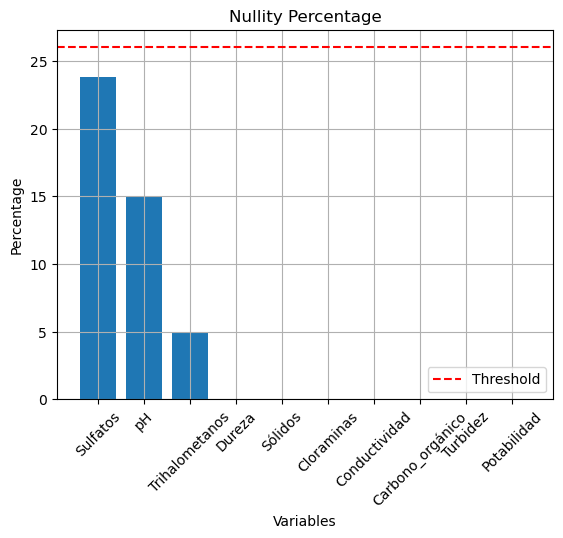

In [43]:
# Plot de porcentaje de nulidad
nullity_plot(df_enc, threshold=26)

###### <!-- Subsection 2.2.2.2 -->
**<h3 id="subsection2222" style="color: rgb(42, 100, 109);">2.2.2.2. Métodos de reconocimiento de mecanismos de nulidad</h3>**

---
Métodos de reconocimiento de mecanismos de nulidad

---

Una vez hemos determinado que no exísten valores implícitos (note que en este escenario, hemos tomado tal consideración debido a que nosotros estamos manejando mayoritariamente datos numéricos contínuos y nuestra úniva variable categórica es la variable `Potabilidad`, la cual no presenta ninguna ausencia), Necesitamos reconocer el **mecanismo de nulidad** presente en nuestros datos para así poder determinar que método de imputación puede ser el más adecuado inicialmente e ir asegurándonos de evitar sesgos en los datos.

Para poder comprobar el mecanísmo de nulidad en nuestros datos debémos valernos tanto de herramientas visuales como de herramientas de estadística inferencial.

- Dentro de las técnicas visuales, emplearemos una graficación de la matriz de los datos para evidenciar si exíste algún patrón en la presencia de valores ausentes. También validarémos la coocurrencia de nulidades entre variables.

- Visualización de los patrones de nulidad en la matriz de datos, donde por ejemplo, si observamos que exísten muchos datos faltantes agrupados en ciertas columnas, podría indicar un problema de recolección de datos sistemático.

A continuación, se enlistan algunas de las estrategias visuales que nos permitirán reconocer el tipo de mecanismo de nulidad que se presenta en los datos:

- **Missing in case plot:** Permíte cuantificar la cantidad de casos de nulidad simultánea.

- **Matriz de nulidad:** Permíte observar la ubicación de nuestros valores nulos, una vez esta matriz es organizada de manera descendente de acuerdo al porcentaje de nulidad por columna, permíte detectar si dentro del dataset exísten patrones organizacionales en los datos que de por sí nos indiquen una ausencia sistemática.

- **Upsetplot:** Permíte cuantificar y establecer las coocurrencias de nulidad entre variables.
 
- **Matriz de sombras y gráfico de percentiles de nulidad**: Al segmentar los datos de una variable numérica $A$ entre aquellos datos que presentan nulidad y aquellos que no presentan nulidad, graficando posteriormente los percentiles de ambos grupos de datos pero con respecto a otra variable $B$, es posible comparar el comportamiento de ambas variables y determinar si exísten rangos de valores de la variable $B$ en los que la nulidad se focaliza para la variable $A$. Esto permite entender que está ocurriendo con los valores faltantes y poder asociarlo con alguno de los mecanísmos de nulidad. Para generar esta visualización es necesario generar primero una `matriz de sombras`.

- **Scatter plot de ausencias mediante técnicas de rellenado**: Corresponde a un scatter plot que mediante  una imputación aleatoria controlada y a partada del rango original de las variables de los datos, permíte identificar patrones de localización de nulidades mediante la comparación de dos variables con ausencias.

- **Matriz de correlación de nulidad:** Cuantifica la correlación entre la aparición de ausencias entre cada variable del dataset.

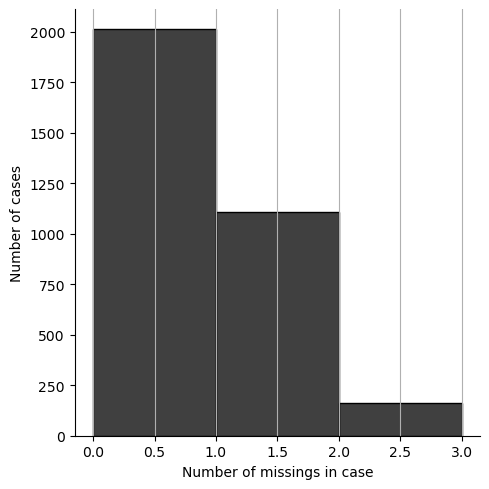

In [49]:
# Visualización de conteo de nulidades conjuntas
df_enc.missing.missing_case_plot()

<Axes: >

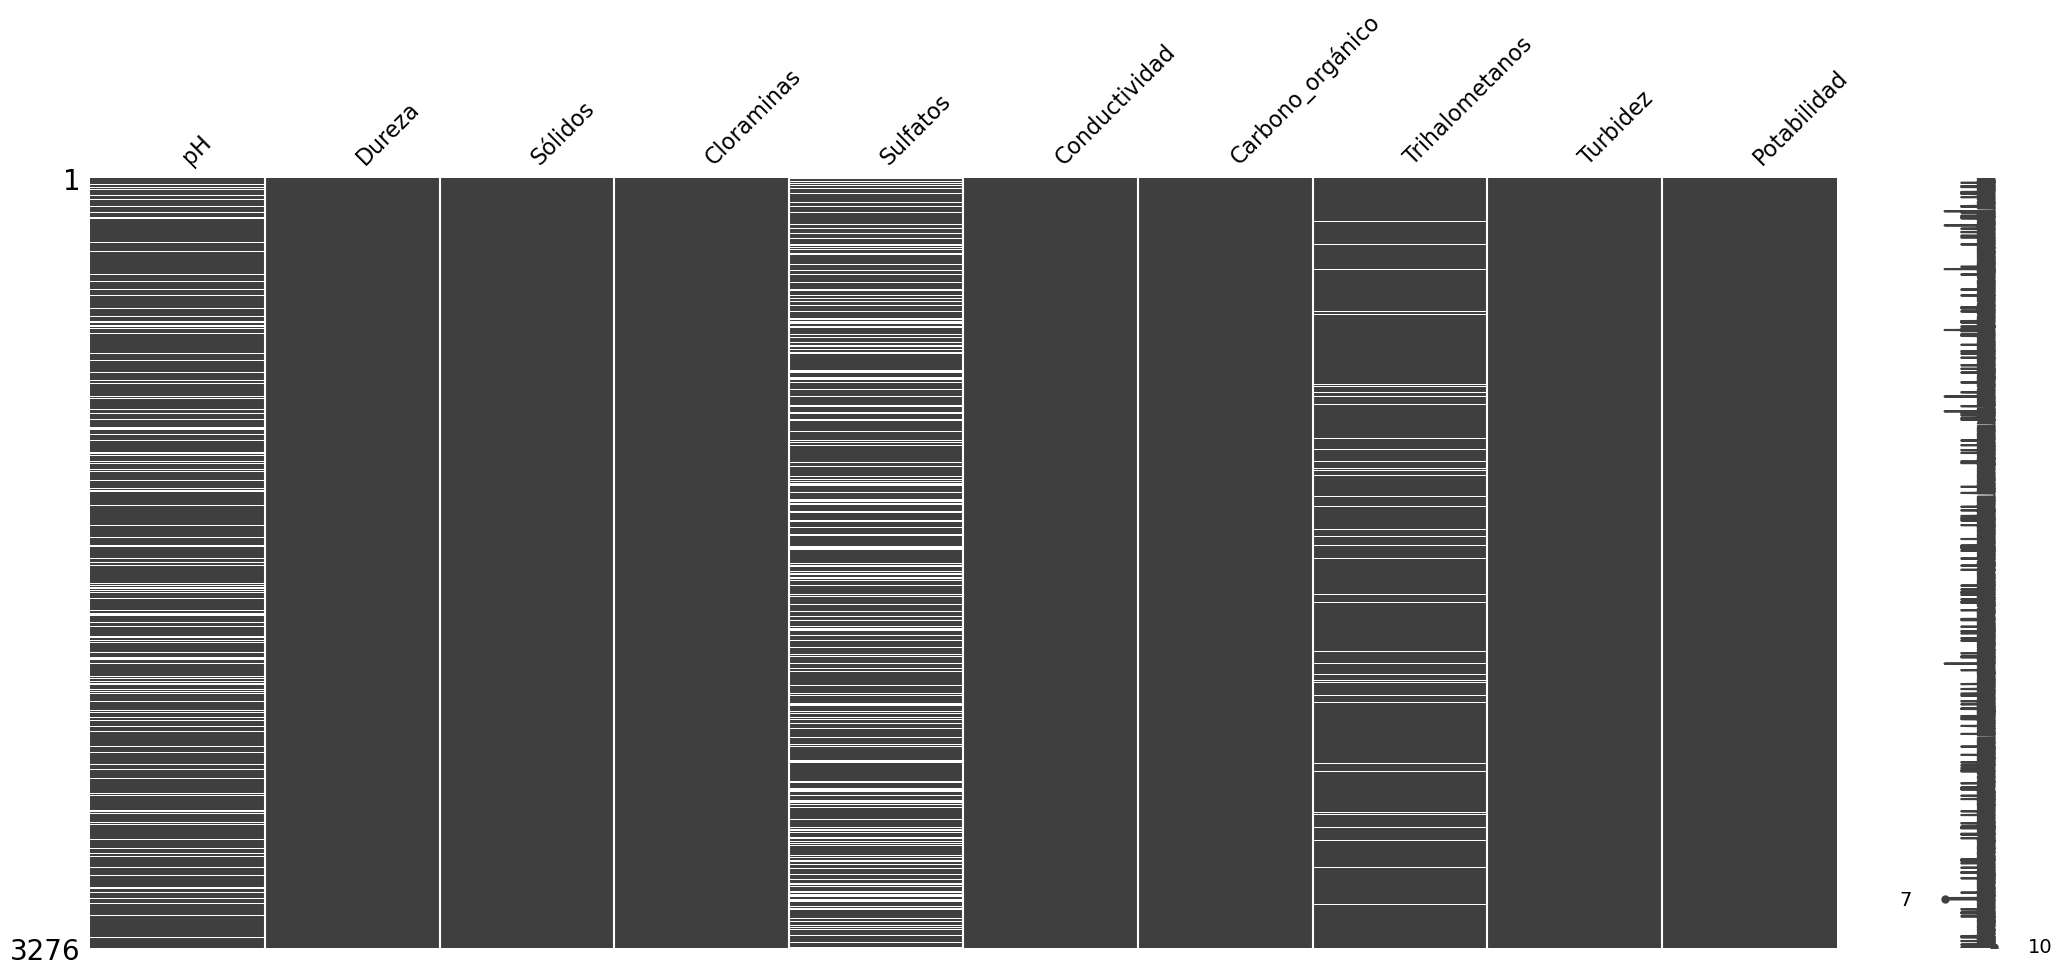

In [10]:
missingno.matrix(df=df_enc)

<Axes: >

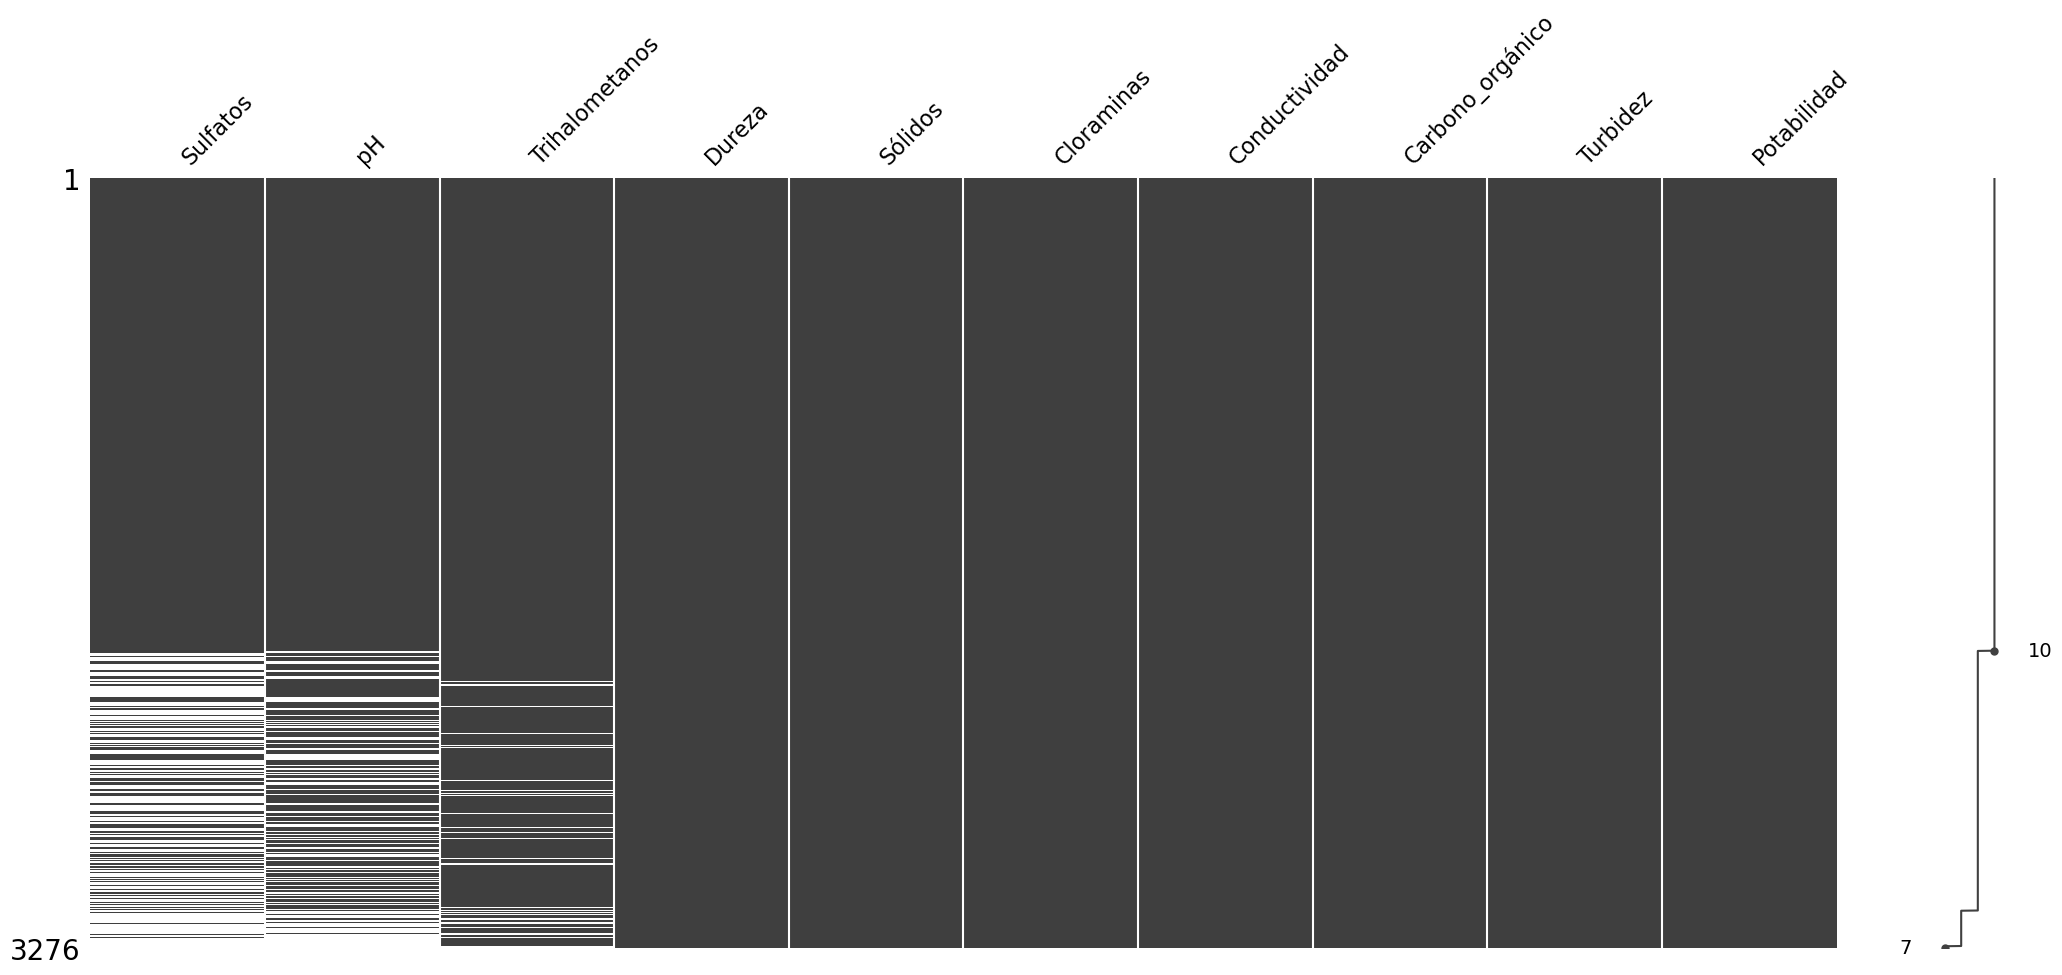

In [11]:
# Empleamos la expansión de la API  de pandas para ver gráficamente las nulidades
(
    df_enc
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

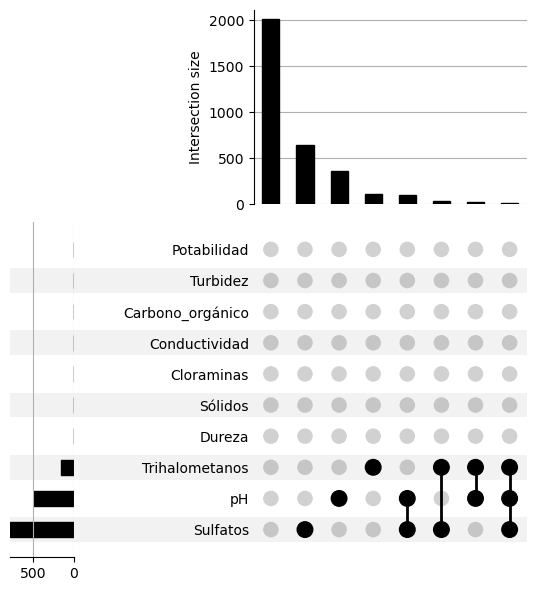

In [13]:
# Upset plot para identificación de coocurencia de nulidades
(
    df_enc
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot(
        variables = list(df_enc.columns)
    )
)

---
Matriz de sombras y gráfico de percentiles de nulidad - Visualización de valores faltantes en una variable

---

Para la construcción de una matriz de sombras, ejecutamos los siguientes pasos:
1. Identificamos los valores faltantes dentro de la matriz de datos.
2. Remplazamos los valores faltanes por `True` y los valores no faltantes por `False`.
3. Reemplazamos los valores `True` y  `False` por una etiqueta que nos permita reconocer cada caso, por ejemplo `NA` para los datos faltantes y `!NA` para los datos no ausentes. Luego, renombramos cada variable de esta matriz tipo máscara con el sufijo `column_name_NA`.
4. Unimos de manera horizontal (columnarmente) los dataframes originales y aquel correspondiente a la matriz de sombras.

In [14]:
# Creación de una matriz de sombras

shadow_enc = (
        df_enc.loc[:, df_enc.isnull().any()]
        #Identificacion de nulidades
        .isnull()
        # Creación de sombras
        .replace({
            True: "Null", 
            False: "Not-Null"
        })
        # Añadimos un sufijo para identificar la variable de sombras
        .add_suffix("_shadow")
    )

shadow_enc.head()

pH_shadow Sulfatos_shadow Trihalometanos_shadow
0      Null        Not-Null              Not-Null
1  Not-Null            Null              Not-Null
2  Not-Null            Null              Not-Null
3  Not-Null        Not-Null              Not-Null
4  Not-Null        Not-Null              Not-Null

In [15]:
# Contatemanos los dataframes
df_enc_shadow = pd.concat(
    [df_enc, shadow_enc],
    axis=1
)

df_enc_shadow.head()

pH  Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0   NaN  204.89  20791.32        7.30    368.52         564.31   
1  3.72  129.42  18630.06        6.64       NaN         592.89   
2  8.10  224.24  19909.54        9.28       NaN         418.61   
3  8.32  214.37  22018.42        8.06    356.89         363.27   
4  9.09  181.10  17978.99        6.55    310.14         398.41   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad pH_shadow  \
0             10.38           86.99      2.96            0      Null   
1             15.18           56.33      4.50            0  Not-Null   
2             16.87           66.42      3.06            0  Not-Null   
3             18.44          100.34      4.63            0  Not-Null   
4             11.56           32.00      4.08            0  Not-Null   

  Sulfatos_shadow Trihalometanos_shadow  
0        Not-Null              Not-Null  
1            Null              Not-Null  
2            Null              Not-Null  
3        Not-Null              Not-Null  
4        Not-Null              Not-Null

Una vez tenemos la matriz de sombras generada, nos vamos a valer de esta para poder ralizar agrupaciones con base a las categorías `Null` y `Not-Null` para posteriormente realizar estudios estadísticos sobre los grupos generados pero con respecto a otras variables y así buscar relaciones que nos ayuden a entender un poco mejor el "origen" de tales nulidades.

En este sentido, **buscamos hallar diferencias significativas entre los estadísticos y comportamientos evidenciados entre los grupos generados.**

In [31]:
# Descripción estadística básica de grupos generados por segmentación de nulidad
df_enc_shadow.groupby('Sulfatos_shadow')['Dureza'].describe().reset_index()

Sulfatos_shadow   count        mean        std     min      25%     50%  \
0        Not-Null  2495.0  196.213455  32.688989   47.43  176.855  197.14   
1            Null   781.0  196.867926  33.497934  103.17  176.790  196.53   

       75%     max  
0  216.425  317.34  
1  218.100  323.12

In [32]:
# Descripción estadística básica de grupos generados por segmentación de nulidad
df_enc_shadow.groupby('Sulfatos_shadow')['Sólidos'].describe().reset_index()

Sulfatos_shadow   count          mean          std     min        25%  \
0        Not-Null  2495.0  22065.860633  8763.541813  320.94  15623.965   
1            Null   781.0  21848.712510  8788.194798  728.75  15736.890   

        50%        75%       max  
0  21043.63  27372.855  61227.20  
1  20574.36  27151.310  56867.86

In [33]:
# Descripción estadística básica de grupos generados por segmentación de nulidad
df_enc_shadow.groupby('Sulfatos_shadow')['Cloraminas'].describe().reset_index()

Sulfatos_shadow   count      mean       std   min   25%   50%   75%    max
0        Not-Null  2495.0  7.119214  1.584209  0.35  6.12  7.14  8.11  13.13
1            Null   781.0  7.131908  1.580705  0.53  6.15  7.12  8.14  12.91

In [34]:
# Descripción estadística básica de grupos generados por segmentación de nulidad
df_enc_shadow.groupby('Sulfatos_shadow')['Conductividad'].describe().reset_index()

Sulfatos_shadow   count        mean        std     min     25%     50%  \
0        Not-Null  2495.0  425.529659  80.775044  201.62  365.21  421.63   
1            Null   781.0  428.363175  80.994755  181.48  368.83  422.29   

      75%     max  
0  481.04  753.34  
1  483.82  674.44

In [35]:
# Descripción estadística básica de grupos generados por segmentación de nulidad
df_enc_shadow.groupby('Sulfatos_shadow')['Carbono_orgánico'].describe().reset_index()

Sulfatos_shadow   count       mean       std  min     25%    50%    75%  \
0        Not-Null  2495.0  14.328285  3.308738  2.2  12.085  14.25  16.62   
1            Null   781.0  14.146389  3.304921  4.9  11.950  14.06  16.33   

     max  
0  27.01  
1  28.30

Un Boxenplot (también conocido como "letter-value plot") es una variante del diagrama de caja y bigotes (boxplot) que está diseñado para representar datos con distribuciones asimétricas o con valores atípicos de manera más efectiva.

Este gráfico se basa en los quantile boxes, que muestran múltiples niveles de cuantiles, permitiendo una mejor visualización de la distribución de los datos en conjuntos grandes. A diferencia de un boxplot estándar, que solo muestra el primer y tercer cuartil junto con los bigotes y valores atípicos, el boxenplot extiende esta idea mostrando más divisiones dentro de los datos. 

Mediante el uso de la matrix de sombras y el boxenplot podemos detectar un mecanismo de nulidad no aleatorio y mas bien sistemático teniendo en cuenta lo siguiente:

- **No efecto sistemático:** Si la mediana, media, dispersión y percentiles son **similares** en ambos grupos, entonces la ausencia de datos en la variable segmentada $A$ **NO** no se debe a un efecto significativo ejercido por la variable $B$.

- **Efecto sistemático:** Si exíste una **diferencia notable** en el comportamiento de las distribuciones de ambos grupos, esto podría indicar que los valores nulos en la variable $A$ están relacionados con la distribución de la variable $B$.

<Axes: xlabel='Sulfatos_shadow', ylabel='Cloraminas'>

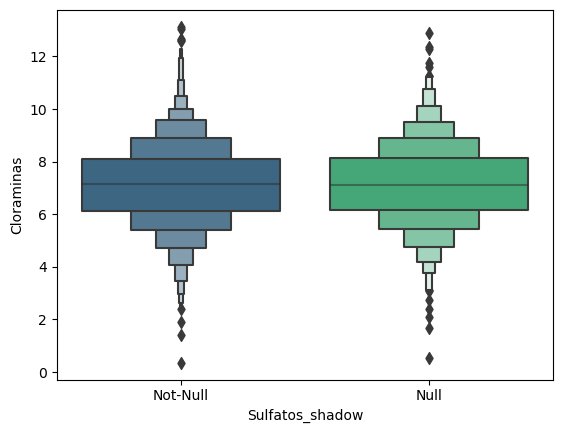

In [ ]:
# Boxenplot mediante el método .pipe()
df_enc_shadow.pipe(
    lambda df: (
        sns.boxenplot(
            data=df,
            x="Sulfatos_shadow",
            y="Cloraminas",
            palette="viridis"
        )
    )
)

<Axes: xlabel='Sulfatos_shadow', ylabel='Dureza'>

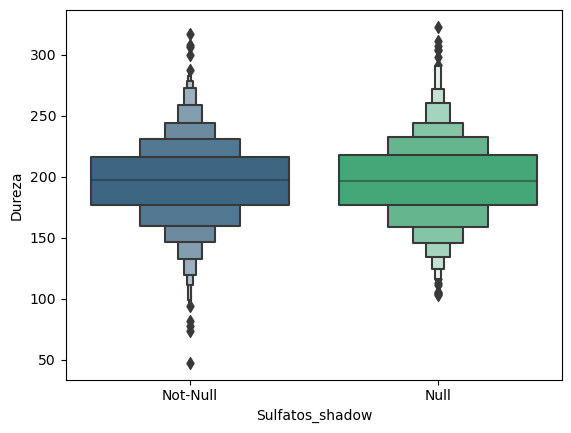

In [36]:
# Boxenplot mediante el método .pipe()
df_enc_shadow.pipe(
    lambda df: (
        sns.boxenplot(
            data=df,
            x="Sulfatos_shadow",
            y="Dureza",
            palette="viridis"
        )
    )
)

<Axes: xlabel='Sulfatos_shadow', ylabel='Dureza'>

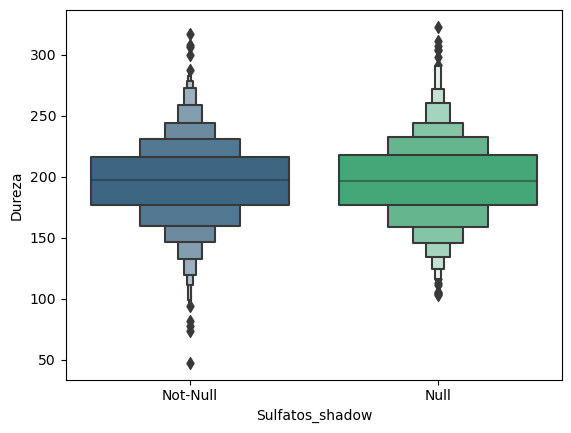

In [37]:
# Boxenplot mediante seaborn
sns.boxenplot(
    data=df_enc_shadow,
    x="Sulfatos_shadow",
    y="Dureza",
    palette="viridis"
)


Como podemos observar a partir de las métricas de resumen y a partir de los boxenplots, no exíste una presencia evidente de un efecto de nulidad sistemático encontrado entre las variables comparadas, concretamente, no podemos decir que la nulidad de `Sulfatos` está sistemáticamente relacionada con la distribución de `Dureza`.

Para ampliar nuestro panorama, primero grafiquemos las distribuciones de los grupos de nulidad y comparemos visualmente sus características.

<Axes: xlabel='Dureza', ylabel='Count'>

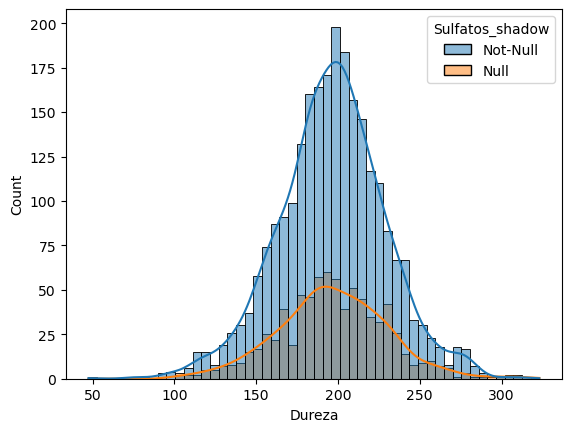

In [51]:
# Histograma mediante seaborn
sns.histplot(
    data=df_enc_shadow,
    hue="Sulfatos_shadow",
    x="Dureza",
    kde=True
)


No obstante, debido a que a veces las escalas de los ejes pueden ser desafiantemente diferentes, podemos generar un gráfico que haga tal comparación de escala más fácil a nuestra vista.

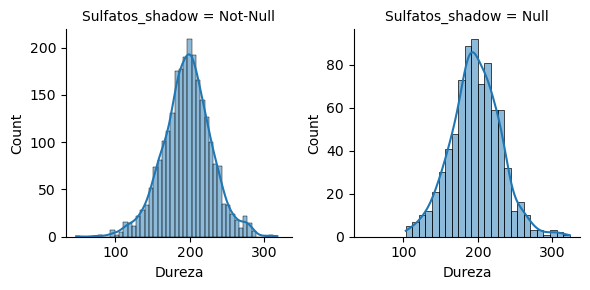

In [54]:
# Comparacion de distribuciones de grupos de nulidad con seaborn antiguo

#sns.distplot(
#    data=df_enc_shadow, 
#    x="Dureza",
#    col="Sulfatos_shadow",
#    facet_kws=dict(sharey=False),
#    kde=True)

# Comparacion de distribuciones de grupos de nulidad con seaborn ultiva version

g = sns.FacetGrid(df_enc_shadow, col="Sulfatos_shadow", sharey=False)
g.map_dataframe(sns.histplot, x="Dureza", kde=True)


No obstante, comparar los comportamientos de los grupos de nulidad entre pares de variables una a una puede ser exteniante. Por eso,  es útil generar diferentes combinaciónes de variables y grupos de nulidad que nos permítan observar en que combinación `variable_A_Null - Variable_B` puede poseer un comportamiento diferenciado.

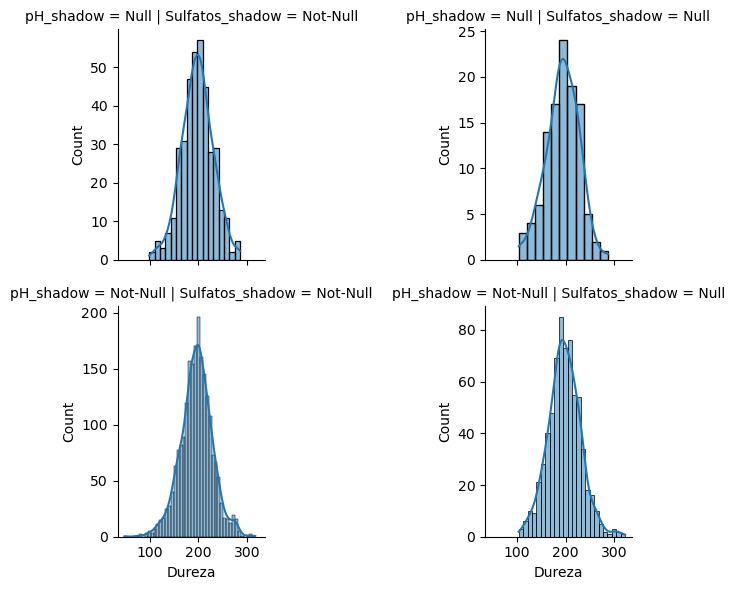

In [62]:
# Comparacion de distribuciones de grupos de nulidad con seaborn antiguo

#sns.distplot(
#    data=df_enc_shadow, 
#    x="Dureza",
#    col="Sulfatos_shadow",
#    row="Ph_shadow",
#    kde=True)

# Comparacion de distribuciones de grupos de nulidad con seaborn ultiva version

g = sns.FacetGrid(df_enc_shadow, col="Sulfatos_shadow", row="pH_shadow", sharex=True, sharey=False)
g.map_dataframe(sns.histplot, x="Dureza", kde=True)
g.fig.subplots_adjust(hspace=0.2, wspace=1.5)
plt.show()

---
Matriz de sombras y gráficos de dispersión - Visualización de valores faltantes en dos variable

---

Detectar valores nulos no solo consiste en identificar en que regístros y variables exísten ausencias y cómo ésto puede afectar nuestras conclusiones sobre nuestros datos, es indispensable a demás llenarnos de argumentos que nos permítan justificar el mecanísmo de nulidad que exíste detrás de cada ausencia para así poder decidir de manera informada si debemos eliminar o imputar mediante alguna técnica en específico de modo tal que no se generen sesgos. Vimos en el anterior apartado cómo al usar una variable numérica como punto de referencia para establecer comparaciones nos permíte esbozar hipótesis a cerca de los mecanísmos de nulidad que pueden estar detrás de la situación particular de nuestros datos.

No obstante, hasta el momento hemos aprendido a cómo detectar valores nulos explícitos, implícitos y detectar patrones en las ausencias de una sola variable ya sea por una visualización directa de los datos o mediante las visualizaciones y agrupaciones que pueden generarse a partir de la matriz de sombras.

En la presente subsección, intentaremos comparar dos variables con ausencias de manera simultánea para ya no solo "preguntar" a una variable sin ausencias cuáles pueden ser los patrones de nulidad que pueden relacionarse con tal variable de referencia sino que aprenderemos a cómo mediante visualizaciones y agrupaciones, determinar si las ausencias de una variable no están solamente relacionadas con determinados rangos de valores de  otras variables completas, sino a demás, que patrones de nulidad pueden existir a causa de la intrínseca relación entre dos variables con ausencias.

En este sentido, para poder comparar dos variables donde ambas poseen nulidades, es necesario **rellenar** las ausencias de cada variable mediante valores aleatorios plausibles que nos permítan graficar en un scatter plot tanto los valores no ausentes como los ausentes. Esta técnica se fundamenta en el objetivo de establecer valores aleatorios como "imputaciones temporales" que nos permítan establecer en que regiones de los rangos de valores de las variables problemáticas se encuentran nuestras nulidades respecto a otra variable.

Generar un scatter plot con **jitter** corresponde a rellenar los valores faltantes de una columna mediante un valor aleatorio no muy grande cuyo valor es muy inferior a los valores originales de la columna, es decir, corresponde a una imputación dummy aleatoria con corrimiento. Para generar un relleno tipo jitter ejecutamos los siguientes pasos:

- Detectamos los valores nulos y contabilizamos cuantos de ellos exísten.
- Calculamos el rango de la variable.
- Generamos un valor de corrimiento, el cual corresponde a la proporción del rango de la variable que usaremos para correr nuestros datos por debajo del rango de los datos originales. Esto nos permite determinar que tanto corrimiento deseamos para los valores imputados por debajo del valor mínimo de la columna.
- Establecemos un parámetro de **jitter** el cual controla la magnitud de ruido agregado a los valores aleatorios.
- Generamos el jitter mediante el cálculo de valores aleatorios entre 0 y 1, luego, multiplicamos los valores aleatorios por el rango de la columna lo cual permíte establecer valores proporcionales al rango. No obstante para evitar un análisis con demasiado ruido, el parámetro **jitter** actúa como un compresor del rango de valores resultantes.

- Imputamos los datos nulos mediante el valor constante por defecto (rango por porporción por debajo del rango) y agregamos los valores jitter. Esto permíte establecer un valor aleatorio para los datos nulos que tienen como referencia un valor constante por debajo del rango, dispersado según el rango de la variable y el factor de compresión.


In [24]:
# Función de relleno tipo Jitter

def column_jitter(column: pd.Series, proportion_below=0.1, jitter=0.075, seed=42) -> pd.Series:
    # Información básica de la columna problemática
    column = column.copy(deep=True)
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()
    
    # Corrimiento de los valores a 'imputar' para apartarlos de los valores originales
    column_shift = column_range * proportion_below 
    
    # Generación de un jitter (noise) para los valores faltantes
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter
    
    # Sobrescribimos los datos nulos
    column[missing_mask] = column_shift + column_jitter 
    
    return column 

Una vez hemos establecido el procedimiento para la imputación por ruido delimitado por rango de variable y comprimido por un valor jitter, debemos incorporar esta imputación temporal a nuestra matriz de sombras.

In [25]:
# Imputación dummy con jitter
df_jitter = df_enc_shadow.apply(
    lambda column: column if "_shadow" in column.name else column_jitter(column, 
                                                                         proportion_below=0.05, 
                                                                         jitter=0.075)
    )

In [26]:
# Equivalencia de imputación dummmy con jitter
df_jitter_ = df_enc_shadow.copy(deep=True)
for column in df_jitter_.columns:
    if "_shadow" in column:
        pass
    else:
        df_jitter_[column] = column_jitter(df_jitter_[column], proportion_below=0.05, jitter=0.075)

# Comprobamos que la manera abreviada de generar el jitter es igual a la forma tradicional
df_jitter.equals(df_jitter_)

True

Generado una vez el dataframe imputado por un ruido comprimido con jitter, procedemos a graficar el scatter plot de nuestro interés.

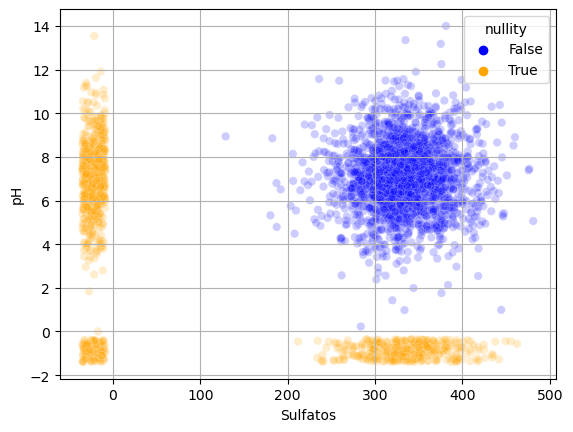

In [46]:
# Scatter plot de nulidades imputadas con jitter
df_jitter_to_plot = df_jitter.copy()  # Copia para no modificar el original
df_jitter_to_plot["nullity"] = df_enc_shadow[["Sulfatos", "pH"]].isna().any(axis=1)

sns.scatterplot(
    data=df_jitter_to_plot,
    x="Sulfatos",
    y="pH",
    hue="nullity",
    palette={True: "Orange", False: "blue"},
    alpha=0.2
)
plt.grid()

Al observar el scatter plot, podemos evidenciar en que rangos de la variable `pH` exísten nulidades para la variable `Sulfatos` y visceversa.  Esto nos permíte evidenciar en donde se están acumulando las nulidades con respecto a dos variables y representa un precedente que nos permitirá evaluar si la imputación que realizaremos es válida o no, ya que buscamos que la imputación no solo no cambie la distribución de los datos sino que también preserve las relaciones entre las variables.

---
Correlación de nulidad

---

El método **`missingno.heatmap()`** se utiliza para visualizar la **correlación de nulidades** entre las columnas de un DataFrame. En lugar de mostrar los valores reales de los datos, este método examina **los valores nulos (NaN)** de las columnas y calcula la relación entre estos valores nulos en diferentes columnas.

1. **Convierte los datos en valores booleanos**:
   Primero, convierte el DataFrame en una **matriz booleana**, donde **True** representa un valor **nulo (NaN)** y **False** representa un valor **no nulo**. Esto ayuda a concentrarse solo en los valores faltantes.
   
   Por ejemplo, si tenemos un DataFrame como este:

   ```python
   import pandas as pd

   df = pd.DataFrame({
       'A': [1, None, 3, 4],
       'B': [None, 2, None, 4],
       'C': [1, 2, 3, None]
   })
   ```

   Se transforma en una matriz booleana de la siguiente forma:

   ```
       A      B      C
   0 False   True  False
   1  True  False  False
   2 False   True  False
   3 False  False   True
   ```

2. **Calcula la correlación entre las columnas de nulos**:
   Calcula la **correlación de Pearson** entre las columnas de esta matriz booleana. Esta correlación mide **cuánto se "relacionan" las columnas en cuanto a la presencia de valores nulos**. Si una columna tiende a tener valores nulos en las mismas filas que otra columna, la correlación será **alta**. Si no coinciden en sus nulos, la correlación será **baja**.

El uso de este método es muy valioso porque te permite **visualizar patrones** y **relaciones** entre las columnas con valores nulos. En los análisis de datos, hay tres tipos principales de **mecanismos de nulidad** que pueden estar presentes en los datos:

1. **MCAR (Missing Completely at Random)**: Si las correlaciones de nulidades entre columnas son **muy bajas** (casi 0), esto podría ser un indicio de que los datos faltantes están **completamente aleatorios** (MCAR).

2. **MAR (Missing at Random)**: Si las correlaciones entre las columnas son **moderadas**, podría ser un indicio de que las nulidades están **relacionadas con otras variables observadas**, lo que sugiere que los datos faltantes son **Missing at Random (MAR)**.

3. **MNAR (Missing Not at Random)**: Si se observan **altas correlaciones** de nulidades entre las columnas, esto podría ser una señal de que los datos faltantes no son aleatorios, sino que están **relacionados con el propio valor faltante**, lo que indica un **mecanismo MNAR**.


<Axes: >

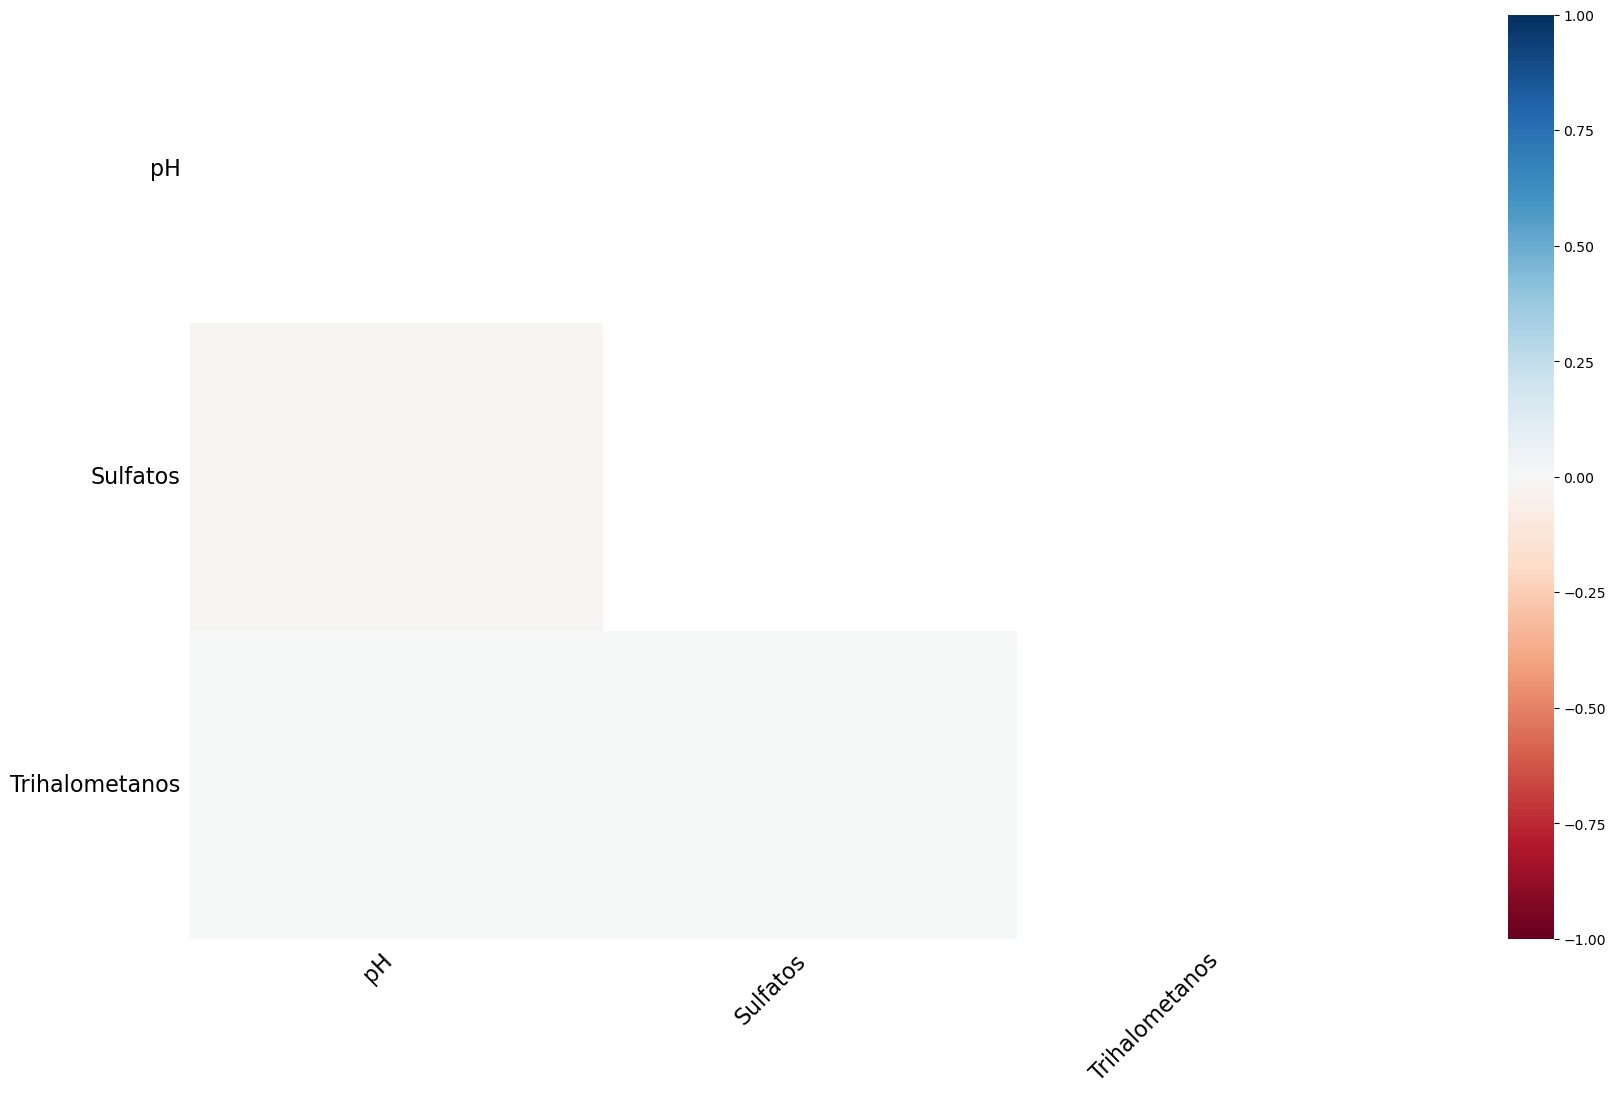

In [47]:
# Correlación de nulidad
missingno.heatmap(
    df=df_enc
)

Con el heatmap de correlación de nulidad, se nos permíte concluir que la presencia de los valores ausentes en cualquiera de nuestra variables no está correlacionada con la ausencia de valores en cualquier otra variable, lo cual es un buen indicio ya que  esta evidencia en conjunto con nuestros análisis por agrupación, boxenplot y jitter scatter plot, nos dan a entender que las ausencias son completamente aleatorias y no sistemáticas, por ende el mecanísmo de nulidad de nuestros datos es MCAR.

Más aún `missingno` tiene una herramienta visual construida a partir de un clustering jerárquico con base a la correlación de nulidad que nos permíte determinar si dos variables poseen coocurrencias de nulidad. De modo tal que si dos variables se encuentran en el mísmo nivel del dendograma, presentan una nulidad altamente correlacionada entre si.

<Axes: >

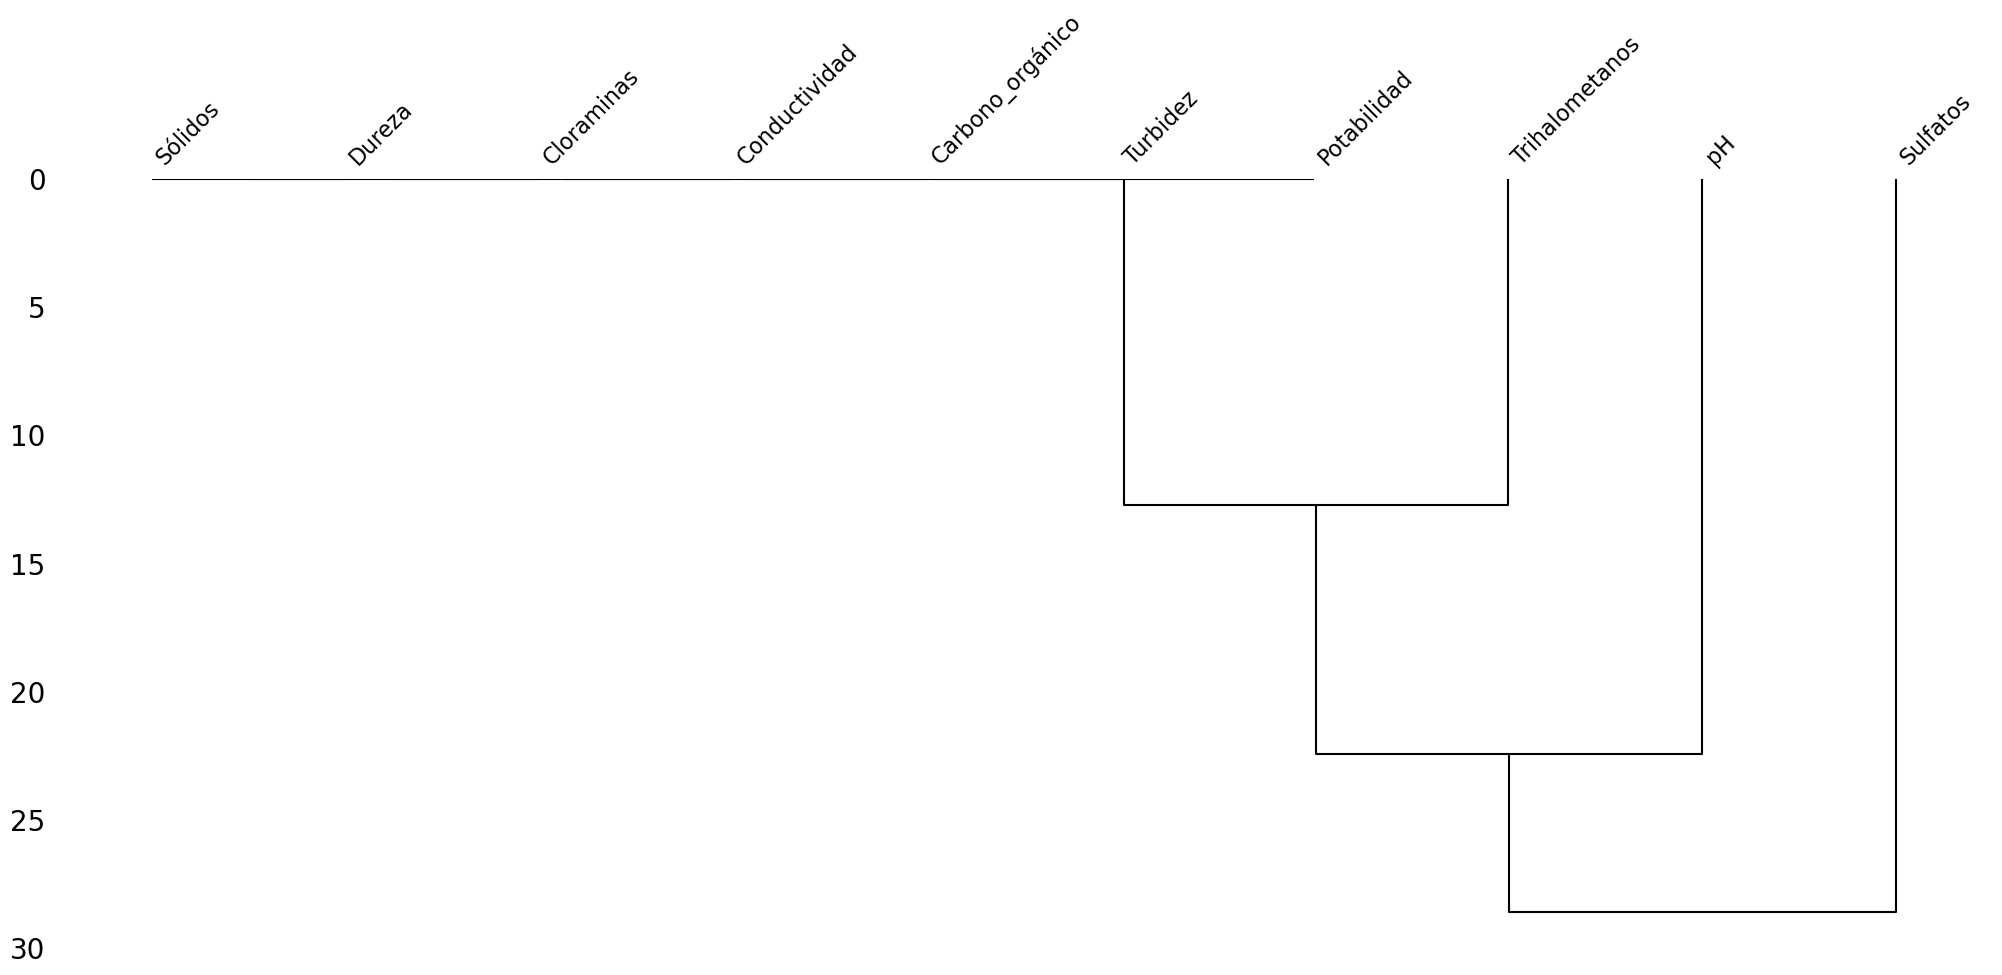

In [48]:
# Dendograma de correlacion de nulidad
missingno.dendrogram(df_enc) 

###### <!-- Subsection 2.2.2.3 -->
**<h3 id="subsection2223" style="color: rgb(42, 100, 109);">2.2.2.3. Métodos de Imputación</h3>**

---
Manejo de valores faltantes por deleción

---

El manejo de valores nulos por deleción es el mecanísmo más primitivo pero sencillo para lidiar con valores nulos, no obstante su uso se basa en asumir que la deleción no causará sesgos en los datos y que el mecanísmo de nulidad es un mecanísmo `MCAR`.

En un escenario donde la coocurrencia de valores nulos a lo largo de múltiples variables represente una cantidad mínima de datos, una opción para lidiar con estas inconsistencias es la deleción de datos que presenten tan coocurrencia.

Exísten dos formas de deleción:
- Deleción general.
- Deleción por subconjunto.

In [50]:
# Deleción general
print("Dimension de los datos originales = ", df_enc.shape)
print("Dimension de los datos con deleción general =", df.dropna().shape)

Dimension de los datos originales =  (3276, 10)
Dimension de los datos con deleción general = (2011, 10)


La mayoría de los calculos ejecutados con pandas como los calculos de medias, desviaciones, entre otros, asumen `pairwise deletion`, lo cual quiere decir que durante la ejecución del cálculo de interés, no se tienen en cuenta los valores nulos. 

Por otra parte, la eliminación por lista hace referencia a que se eliminará un regístro si se encuentra un valor nulo a lo largo de las columnas especificadas:

- `all`: Este método indica que eliminará aquellos regístros que presenten nulidades simultáneas a lo largo de todas las columnas especificadas.

- `any`: Este método indica que eliminará aquelos regístros que presenten nulidad en al menos una de las variables especificadas.

In [55]:
# Eliminación de datos con nulidades coocurrentes
df_enc_noco = df_enc.dropna(subset=['Trihalometanos', 'Sulfatos', 'pH'], how='all')
print(df_enc.shape)
print(df_enc_noco.shape)
print('Numero de filas se eliminaron =', df_enc.shape[0] - df_enc_noco.shape[0])

(3276, 10)
(3267, 10)
Numero de filas se eliminaron = 9


---
Imputación de valores nulos por donantes

---

La imputación de ausencias por donantes es la forma más sencilla de imputación, donde el donante hace referencia a un valor constante que bien sea por el comportamiento de los datos o por el contexto de los mísmos, sirve como una estimación rudimentaria. Estos valores pueden ser una cantidad impuesta por el analista de datos o simplemente alguna métrica de tendencia central como el promedio o la media, mientas que para las variables categóricas es mas usual usar la moda.


In [57]:
# Imputación tradicional por donantes
df_enc_don = df_enc.copy()

for column in df_enc_don.columns:
    if df_enc_don[column].dtype == float:
        mean_value = df_enc_don[column].mean()
        df_enc_don[column] = df_enc_don[column].fillna(mean_value)
    elif df_enc_don[column].dtype == int:
        mean_value = np.floor(df_enc_don[column].mean())
        df_enc_don[column] = df_enc_don[column].fillna(mean_value)
    elif df_enc_don[column].dtype == 'object':
        mode_value = np.floor(df_enc_don[column].mode()[0])
        df_enc_don[column] = df_enc_don[column].fillna(mode_value)
    else:
        pass
    
df_enc_don.isnull().sum()

pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono_orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64

---
Imputación por modelos

---

Una vez hemos realizado la numerización de los datos, procederémos a manejar los datos nulos mediante técnicas de imputación por modelos. Ésto debido a que en primer lugar, las variables categóricas del problema no presentan ausencias así que no será necesario emplear técnicas como imputación por el más frecuente. Más aún, técnicas como imputación por promedio en los datos numéricos no suelen ser demasiado realistas.

Así pues, en la presente sección emplearemos la técnica de imputación por medio dos métodos muy poderosos y flexibles para solventar problemas de nulidad MCAR y MAR:

del modelo KNN regresor de modo tal que los valores a imputar serán deducidos a partir de la similaridad del regístro con otros regístros en el dataset.
Por defecto, el imputador KNN emplea los 5 regístros mas similares para imputar los valores en las columnas donde exísten ausencias.

### **Imputación KNN:**

Para cada valor faltante, el algoritmo de imputación KNN opera de la siguiente manera:

1. Identifica los K registros más similares (vecinos más cercanos) que sí posean algún valor en la variable problemática para el regístro en cuestión, donde la similaridad calculada entre el regístro con ausencia y los demás, se calcula usando una medida de distancia como la distancia euclideana  entre los regístros a comparar con base a las variables no ausentes.

2. Imputa el valor faltante usando el promedio (para variables numéricas) o la moda (para categóricas) de los valores de esos K vecinos

La similitud entre registros se calcula típicamente con distancia euclidiana para variables numéricas o distancia de Hamming para categóricas.


### **Imputación MICE:**

El método MICE (Multiple Imputation by Chained Equations) funciona de la siguiente manera:

1. Realiza una imputación inicial simple (como la media) para todos los valores faltantes. Esto crea un conjunto de datos temporalmente "completo"

2. Para cada variable con valores faltantes:

    - Marca sus valores imputados como faltantes nuevamente.
    - Construye un modelo de regresión usando las otras variables como predictores.
    - Imputa los valores faltantes usando predicciones de este modelo.
    - Añade un término aleatorio para mantener la variabilidad.

3. Ciclo de Iteraciones:

    - Este proceso se repite varias veces (iteraciones) hasta alcanzar convergencia.
    - Típicamente se realizan entre 10-20 iteraciones.

4. Imputaciones Múltiples:

    - Todo el proceso se repite M veces (típicamente 5-10). Esto genera M conjuntos de datos completos.

Las ventajas principales de MICE son:

- Preserva las relaciones entre variables
- Mantiene la incertidumbre en las imputaciones
- Considera la estructura de los datos

Teniendo en cuenta estos conceptos, la implementación del método `KNN` es la siguiente:

In [76]:
# Función de imputación por algoritmo KNN
from sklearn.impute import KNNImputer

def knn_imputator(dataframe):
  df = dataframe.copy()
  knn = KNNImputer()
  df = pd.DataFrame(knn.fit_transform(df), columns = df.columns)
  return df

In [77]:
# Imputación de valores por medio del algoritmo KNN
df_knn = knn_imputator(df_enc)
df_knn.isnull().sum()

pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono_orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64

Por otra parte, el método `MICE` se implementa de la siguiente manera.

In [84]:
# Imputacion MICE iterativa en scikitlearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge


def mice_imputer(df, estimator = BayesianRidge(),
                 random_state=42, max_iter=100, initial_strategy='mean'):

    imputer = IterativeImputer(
        estimator=estimator,               # Modelo de regresión a usar
        random_state=random_state,         # Para reproducibilidad
        max_iter=max_iter,                 # Máximo de iteraciones para el modelo
        initial_strategy=initial_strategy  # Estrategia inicial de imputación
    )


    X_imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(X_imputed, columns=df.columns, index=df.index)
    return df_imputed

In [86]:
# Imputaciones MICE
df_mice = mice_imputer(df_enc)
df_mice.isnull().sum()

pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono_orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64

##### <!-- Subsection 2.2.3 -->
**<h3 id="subsection223" style="color: rgb(42, 100, 109);">2.2.3. Verificación de validez de la imputación</h3>**

---
Verificación de validez de la imputación

---

Una vez hemos realizado la imputación de los datos, realicemos un breve análisis para verificar que los datos no hayan cambiado sustancialmente después de la imputación y descartar que el método haya generado sesgos cambiando la distribución de los datos.

Para realizar el análisis visual, se emplea el constructor ```inputation_plots()```, el cual se encuentra dentro del notebook complementario al presente llamado ```visuals```, el cual nos permitirá comparar las distribuciones de las variables imputadas antes y después de la imputación.



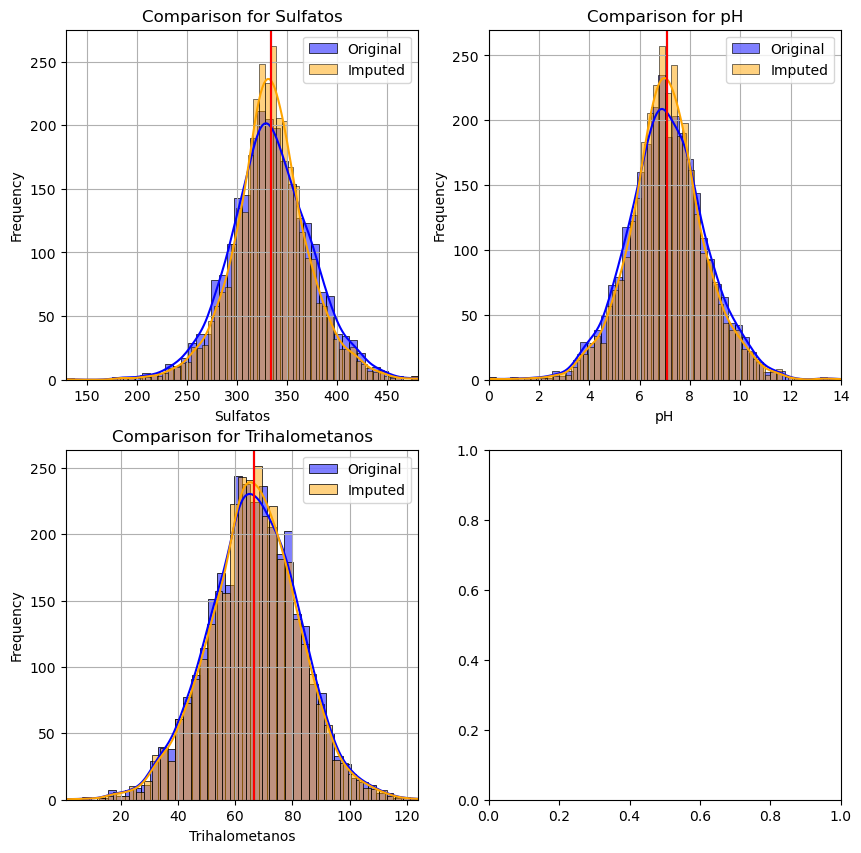

In [92]:
# Comparación de distribuciónes de las variables imputadas antes y después de la imputación
imputer_plot = imputation_plots()
problematic_columns = ['Sulfatos', 'pH', 'Trihalometanos']
imputer_plot.plot_inputation_comparison(df, df_knn, problematic_columns, (2,2), (10,10))

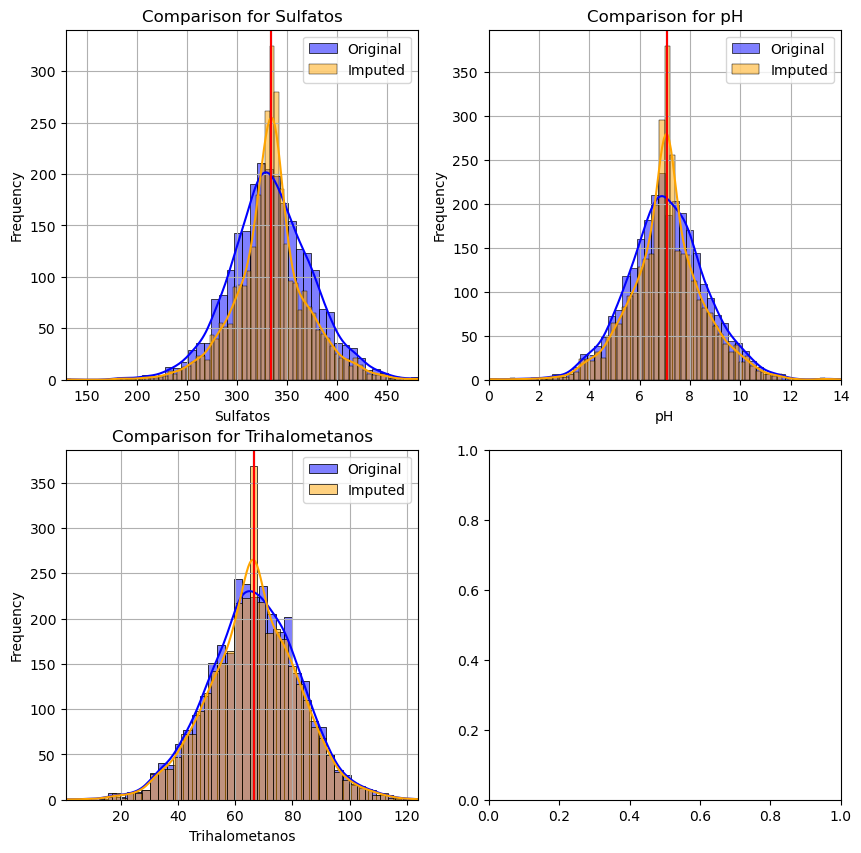

In [93]:
# Comparación de distribuciónes de las variables imputadas antes y después de la imputación
imputer_plot = imputation_plots()
problematic_columns = ['Sulfatos', 'pH', 'Trihalometanos']
imputer_plot.plot_inputation_comparison(df, df_mice, problematic_columns, (2,2), (10,10))

Vemos en los graficos anteriores que el método de imputación parece ser exitoso, ya que no cambia sustancialmente la distribución de los datos y éstas variables conservan su forma de distribución similar a una distribución normal. Note entonces que es para las variables "Sulfatos" y "pH" en donde más diferencias (aunque leves) exísten entre las distribuciones, lo cuál puede explicarse a que estas dos son las variables que más imputación necesitan, por ende, una mayor cantidad de regístros "artificiales" han sido ingresados a los datos aumentando el conteo de datos en la parte central de la distribución.

No obstante note que los promedios, simbolizados por las líneas verticales "roja" y "negra" respectivamente correspondientes a las distribuciones imputadas y originales, se alínean casi a la perfección y no se evidencia ningún corrimiento de la distribución imputada con respecto a la distribución original. La única leve diferencia entre ambas distribuciones es un mayor número de conteo de valores en la parte central de la distribución, haciendo que la distribución imputada se encuentre ligeramente por encima de la distribución original en la parte central de la campana.

Por otra parte, dentro de la sección de dependencias presente en el presente notebook, se encuentra la función `imputation_test` la cual es una función construida para ejecutar diferentes test estadísticos de testeo de hipotesis la cual usaremos a continuación para determinar si las distribuciones antes y después de la imputación, presentan diferencias significativas. Para ello, tengamos en cuenta lo siguiente:

1. **Hipótesis Nula (H0)**: La hipótesis nula es que **no hay diferencia** significativa entre las distribuciones original e imputada, lo que significa que el método de imputación no introduce sesgo.

2. **Hipótesis Alternativa (H1)**: La hipótesis alternativa es que **hay una diferencia significativa** entre las distribuciones, lo que indica que el método de imputación introduce sesgo.

3. **Interpretación del p-value**: El p-value es la probabilidad de observar una diferencia tan grande o más grande entre las distribuciones original e imputada, si la hipótesis nula fuera verdadera. Por lo tanto, un p-value bajo indica que la diferencia observada es poco probable de haber ocurrido por casualidad bajo la hipótesis nula.

Si el p-value es menor que un nivel de significancia predefinido (por ejemplo, 0.05), entonces rechazamos la hipótesis nula y concluimos que hay evidencia suficiente para afirmar que hay una diferencia significativa entre las distribuciones. En este caso, podríamos decir que el método de imputación introduce sesgo.

Si el p-value es mayor que el nivel de significancia, no hay suficiente evidencia para rechazar la hipótesis nula. En este caso, no podemos concluir que el método de imputación introduce sesgo significativo en la distribución.

In [94]:
# Validación de hipótesis para imputación por knn
problematic_columns = ['Sulfatos', 'pH', 'Trihalometanos']
knn_test = imputation_test(df, df_knn, problematic_columns)
knn_test

Item     Sulfatos        pH  Trihalometanos
0             t-test     0.160953  0.066108       -0.017275
1            p-value     0.872137  0.947294        0.986218
2            ks_test     0.043969  0.026596        0.011510
3         p_value_ks     0.008050  0.231939        0.981860
4      observed mean   333.775784  7.080804       66.396281
5       imputed mean   333.605774  7.078162       66.403204
6  observed variance  1715.356589  2.542014      261.630070
7   imputed variance  1402.732954  2.241844      250.833609
8    mean difference     0.170009  0.002642        0.006923
9     var difference   312.623635  0.300170       10.796461

In [95]:
# Validación de hipótesis para imputación por knn
problematic_columns = ['Sulfatos', 'pH', 'Trihalometanos']
knn_test = imputation_test(df, df_mice, problematic_columns)
knn_test

Item      Sulfatos        pH  Trihalometanos
0             t-test -8.852439e-03  0.016470        0.002212
1            p-value  9.929372e-01  0.986860        0.998235
2            ks_test  7.815264e-02  0.058479        0.024551
3         p_value_ks  5.640756e-08  0.000064        0.284621
4      observed mean  3.337758e+02  7.080804       66.396281
5       imputed mean  3.337850e+02  7.080151       66.395397
6  observed variance  1.715357e+03  2.542014      261.630070
7   imputed variance  1.324075e+03  2.165661      248.689639
8    mean difference  9.249389e-03  0.000653        0.000884
9     var difference  3.912811e+02  0.376353       12.940431

Podemos observar de la tabla anterior que el p-value del t-test para las tres variables es superior a 0.05, por ende, el método de imputación por KNN es exitoso ya que no hay evidencia suficiente para concluir que exíste un sesgo introducido por la imputación.
Más aún, se evidencia que la diferencia de los promedios para los tres casos es casi nulo y la diferencia en las varianzas es pequeña, por ende, este método es adecuado para procesar los datos nulos.

Una vez hemos validado las imputaciones por modelos tanto por el analisis individual de las distribuciones como por medio de los test estadísticos, necesitamos reconocer que las relaciones entre variables se preserven. Corroborar esto implica realizar un gran número de visualizaciones propias del proceso EDA, no obstante un scatter plot sencillo es un paso inicial y necesario para corroborar que tales relaciones sean preservadas.

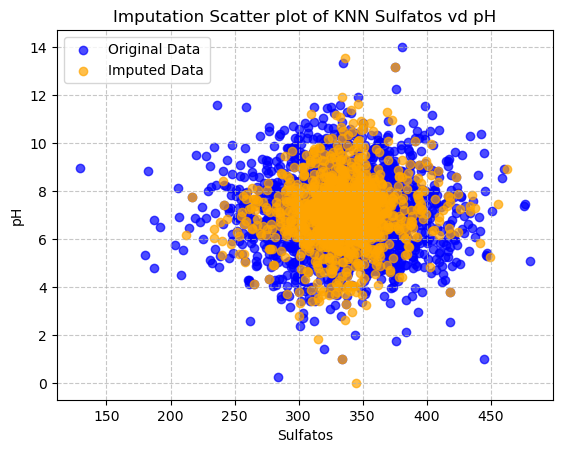

In [100]:
# KNN imputation scatter plot
problematic_columns = ['Sulfatos', 'pH']
imputation_scatter_plot(df, df_knn, problematic_columns ,  title='Imputation Scatter plot of KNN')

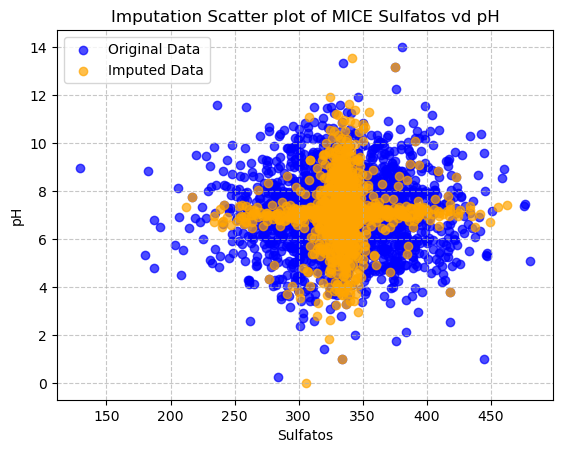

In [101]:
# MICE imputation scatter plot
problematic_columns = ['Sulfatos', 'pH']
imputation_scatter_plot(df, df_mice, problematic_columns ,  title='Imputation Scatter plot of MICE')

### <!-- Subsection 2.3 -->
**<h3 id="subsection23" style="color: rgb(42, 100, 109);">2.3. Análisis univariado de variables numéricas</h3>**

---
Análisis de Variables numéricas

---

Ya que no exísten valores nulos en nuestras variables, procedemos con el análisis univariado de nuestro dataset. Para empezar, observemos las distribuciones de las variables numéricas contínuas y para la variable `'cnt'` e intentemos detectar posibles valores atípicos o outliers. Para ésto, emplearemos una visualización de histograma y boxplot mediante la función `histogram_box`, presente en la sección de utilidades del presente notebook.

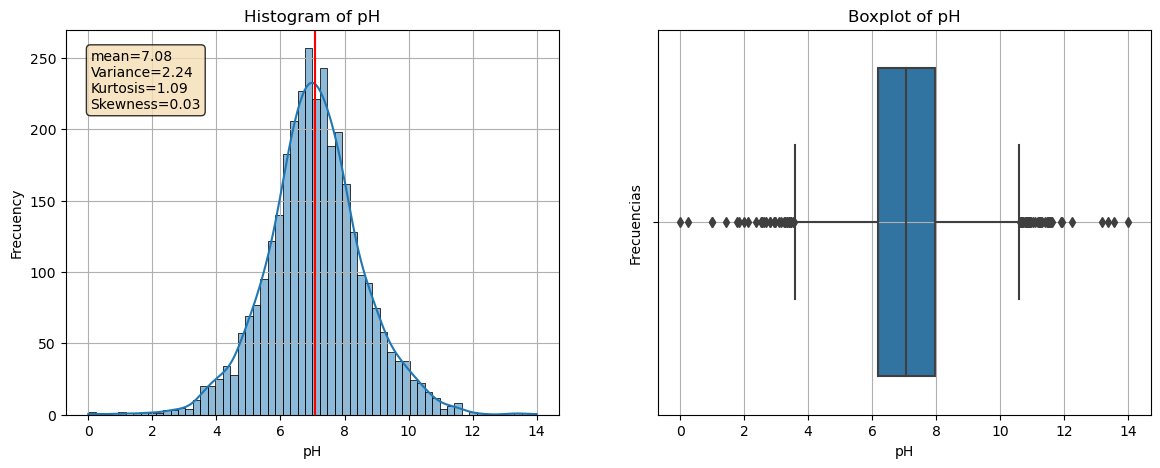

In [102]:
# Distribución (histograma) de la variable cantidad de Ph
histogram_box(df_knn, 'pH')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable PH es muy similar a una distribución normal.
* El centro de los datos, su promedio y mediana, se encuentra justo en el centro del rango permitido de PH 6.5 - 8.5. Lo cual insinúa que la mayoría de datos posee un valor aceptable como potable y exíste una pequeña cantidad de datos con ph extremo hacia arriba o abajo, es decir, o muy alto o muy bajo.
* Exíste una cantidad considerable de valores atípicos pero que no es superior o comparable al conjunto de datos centrados en el valor promedio.
* Lo anterior nos indíca que exíste una candidad escasa de muestras de agua muy pura, y una cantidad escasa de muestras de agua altamente contaminadas.
* La distribución es simétrica, baja varianza y gran concentración al rededor del valor medio.

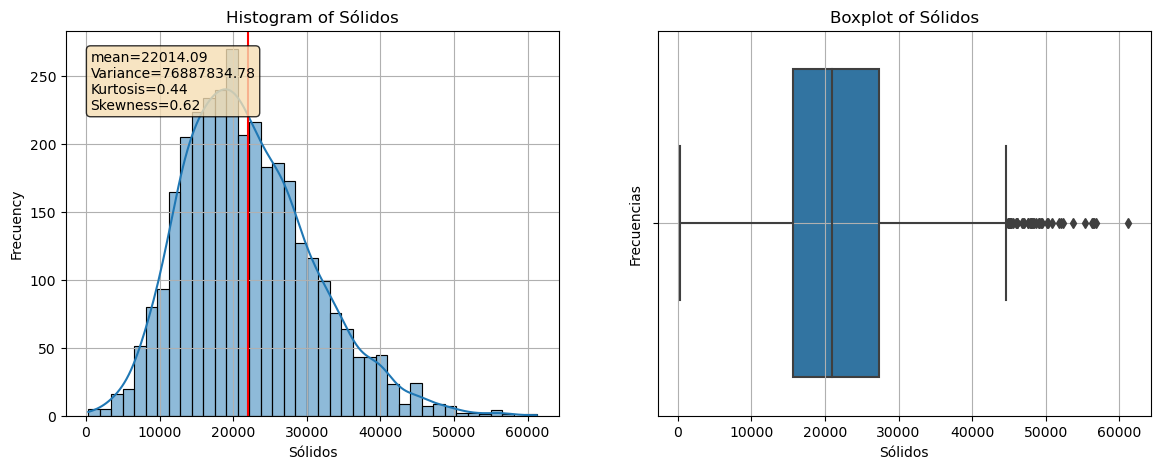

In [103]:
# Distribución (histograma) de la variable solidos
histogram_box(df_knn, 'Sólidos')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Solidos presenta un pequeño sesgo positivo, hacia la derecha.
* El promedio de los datos se encuentra por encima del valor recomendado de sólidos disueltos 500mg/l - 1000mg/l.
* Exíste una cantidad considerable de valores atípicos pero que no es superior o comparable al conjunto de datos centrados en el valor promedio hacia la derecha, es decir, exíste una cantidad de muestras de agua con una alta concentración de sólidos disueltos.
* La concentración de los valores es cercana a la concentración mesocurtica, es decir, los valores no estan fuertemente concentrados en un rango estrecho central de valores.


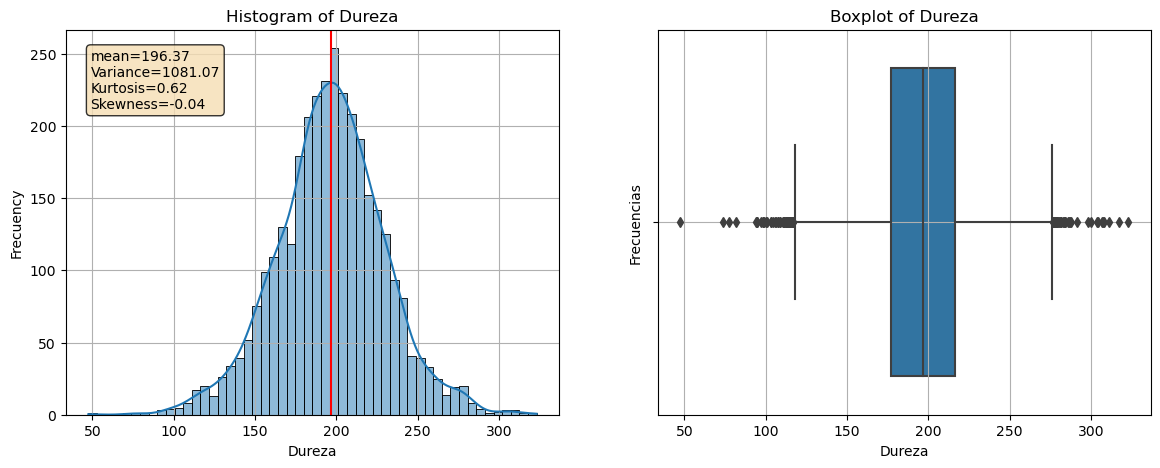

In [104]:
# Distribución (histograma) de la variable cantidad de dureza
histogram_box(df_knn, 'Dureza')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Dureza es muy similar a una distribución normal.
* Es demasiado probable encontrar muestras de agua con alto contenido de sales y magnesio.
* La distribución es simétrica, alta varianza y baja concentración al rededor del valor medio.
* La concentración de valores tiende a comportarse leptocurticamente, es decir, exíste una gran cantidad de datos cuyos valores se encuentran en torno a un rango estrecho de valores centrados en el promedio de los datos.

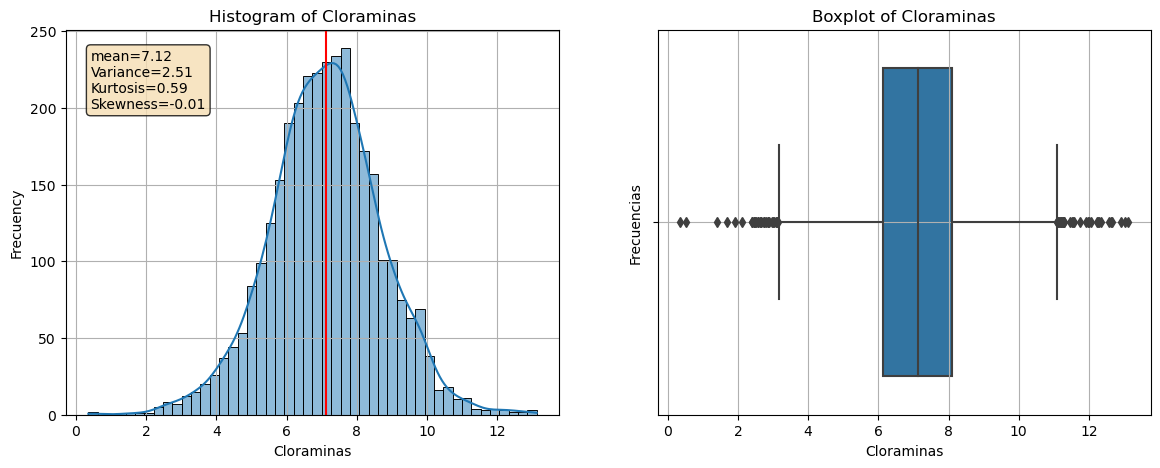

In [105]:
# Distribución (histograma) de la variable cantidad de Cloraminas
histogram_box(df_knn, 'Cloraminas')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Cloraminas es muy similar a una distribución normal.
* Se puede observar que la distribución se encuentra centrada entre 6 y 8, niveles superiores al nivel de cloramina considerado como seguro. Esto quiere decir que la mayoría de los datos se encuentran al rededor de valores NO seguros de cloro y cloraminas, por ende, es muy probable que las muestras de agua tomadas sean en su mayoría NO potables.
* Exíste una varianza pequeña en los datos y una kurtosis pequeña pero positiva, lo cual indica que la distribución tiende a tener una concentración leptocúrtica.

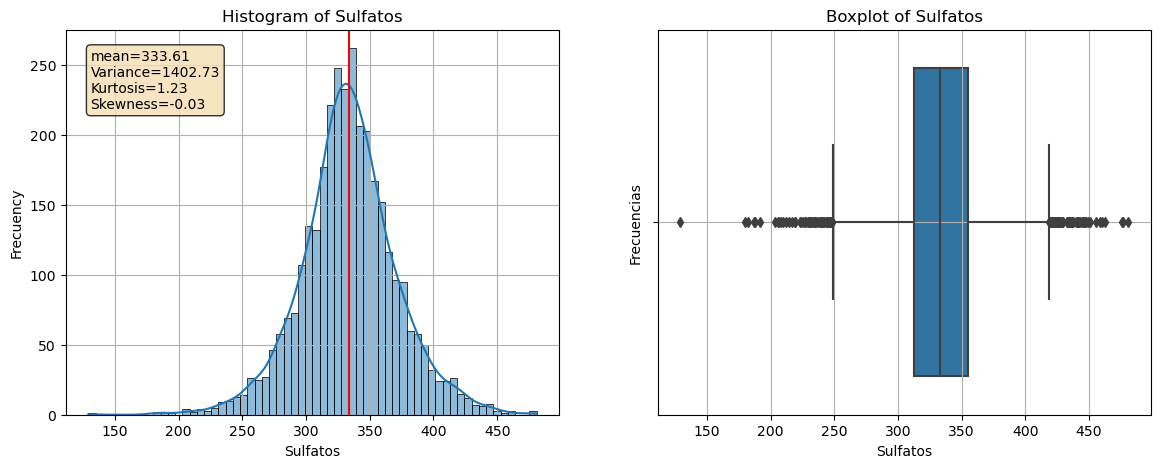

In [106]:
# Distribución (histograma) de la variable cantidad de Cloraminas
histogram_box(df_knn, 'Sulfatos')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Sulfatos es muy similar a una distribución normal.
* Se puede observar que la distribución se encuentra centrada en el valor de concentración de sulfatos igual a 333 mg/l, nivel inseguro o no apropiado de sulfato. En general, la concentración ideal de sulfato se encuentra entre 3 mg/l y 30 mg/l. No obstante el nivel seguro de concentración de sulfato es de 250 mg/l, por ende, esta variable nos dice que la gran mayoría de las muestras de agua son consideradas como NO potables.
* La distribución es leptocurtica, lo que indica que existe una marcada concentración de los valores en un rango estrecho al rededor del valor central de la distribución.

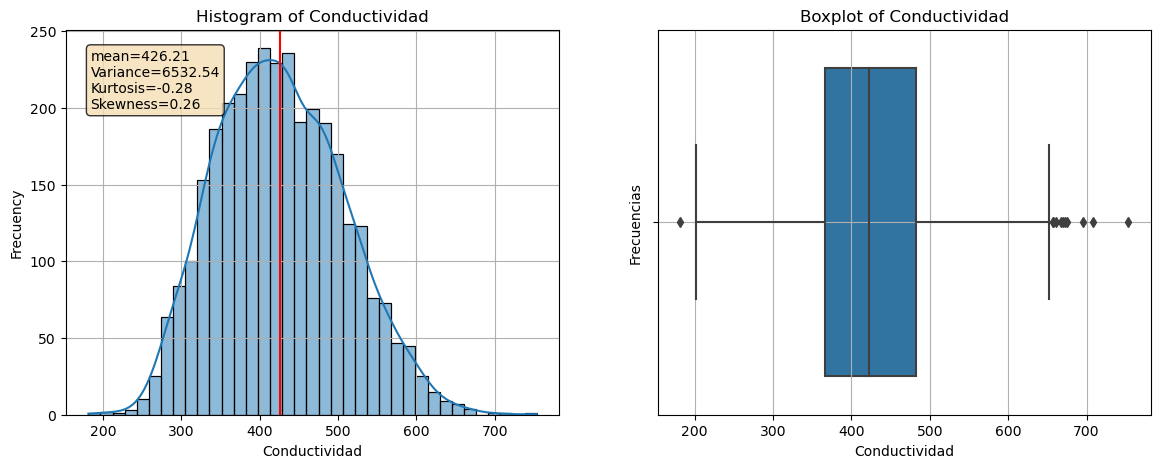

In [107]:
# Distribución (histograma) de la variable conductividad
histogram_box(df_knn, 'Conductividad')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Conductividad es muy similar a una distribución normal.
* Se puede observar que la distribución se encuentra centrada en el valor de conductividad de 426, valor ligeramente superor al valor límite de conductividad de agua potable, asi que a pesar de que la distribución presenta un leve sesgo positivo indicando que la mayor concentración de valores de conductividad se encuentra en valores bajos de conductividad, el bajo nivel de kurtosis el cual es mesocurtico, indica que exíste una concentración de valores en un rango amplio. Si observamos la distribución, podemos ver que la mayoria de valores se encuentra entre 300 y 500, valores altos y no aceptados. Por ende, se puede ver que la mayoría de las muestras NO son potables.


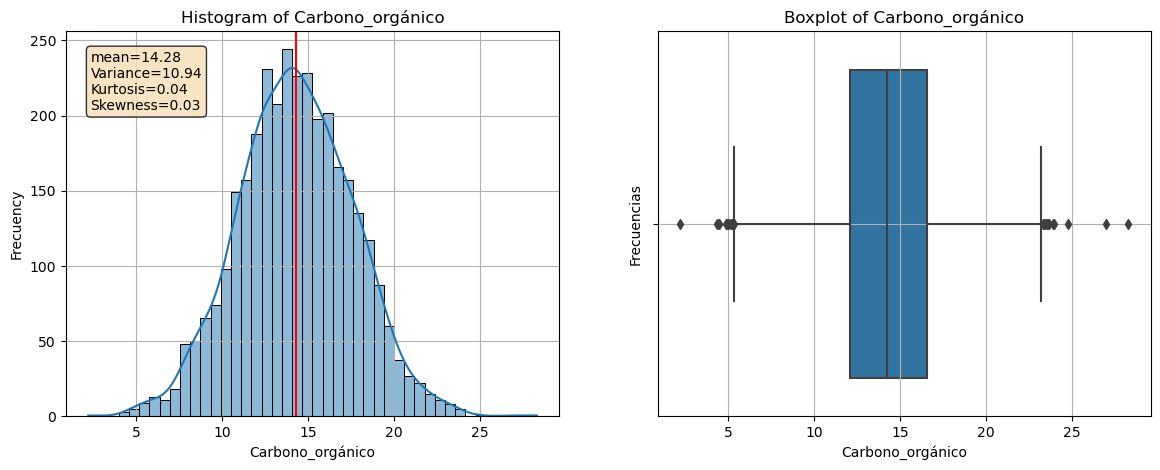

In [108]:
# Distribución (histograma) de la variable carbono orgánico
histogram_box(df_knn, 'Carbono_orgánico')

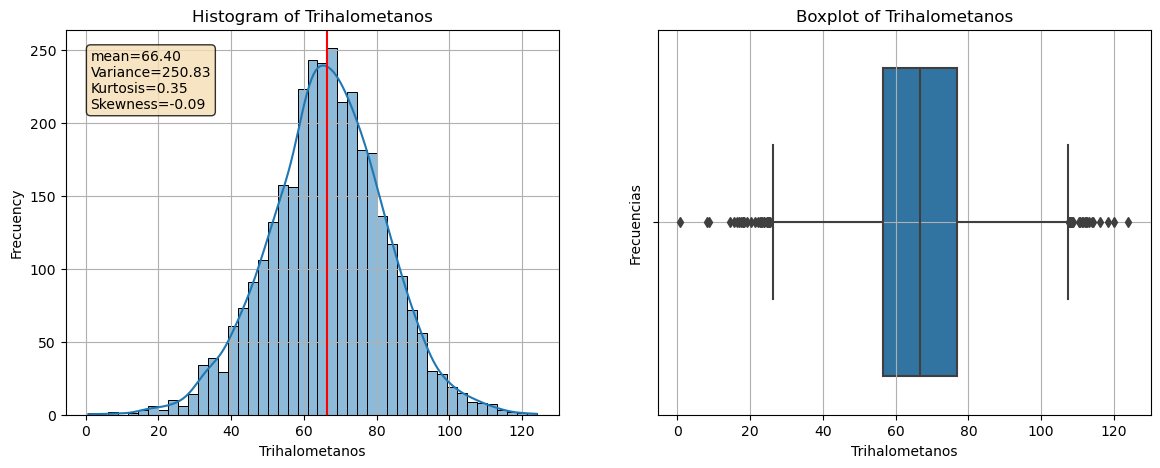

In [109]:
# Distribución (histograma) de la variable Trihalometanos
histogram_box(df_knn, 'Trihalometanos')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Thrihalometanos es muy similar a una distribución normal.
* Se puede observar que la distribución se encuentra centrada en el valor de concentración de 66, valor cercano al límite de aceptabilidad de concentración el cuál es 80. Esto nos indica que al ser una distribución con bajo kurtosis cercano a un nivel mesocúrtico, los valores de aceptabilidad de concentración se encuentran casi normalmente distribuidos, lo cual indica que exíste una gran cantidad de muestras que de acuerdo a esta variable, son potables, y una cantidad similar de muestras que no lo son. No obstante, las muestras potables corresponden a aguas de baja pureza.


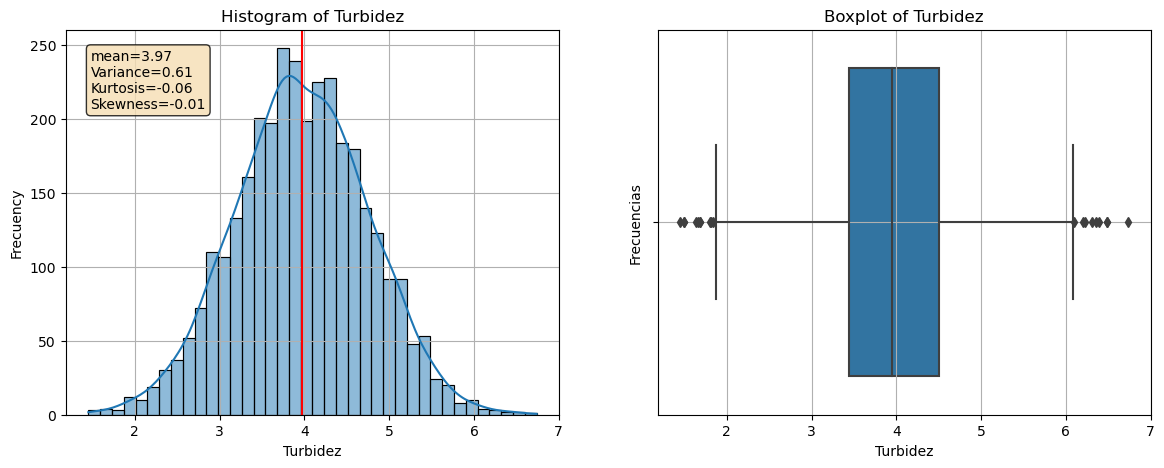

In [110]:
# Distribución (histograma) de la variable 'Turbidez'
histogram_box(df_knn, 'Turbidez')

A partir de la visualizacion anterior, podemos observar lo siguiente:
* El comportamiento de la variable Turbidez es muy similar a una distribución normal.
* Se puede observar que la distribución se encuentra centrada en el valor de turbidez se encuentra muy por encima de lo aceptado por el GWP y por dabajo de lo que la OMS recomienda. No obstante, la mayor parte de las muestras poseen un alto nivel de turbidez que limita con la impotabilidad del agua.

En general, a partir de las anteriores distribuciones podemos concluir lo siguiente:
1. Es muy probable encontrar que la mayoría de las muestras de agua sean consideradas como NO potables, ya que en general, la gran mayoría de muestras posee alta dureza, gran cantidad de sólidos, gran cantidad de sulfatos, alta conductividad, alta cantidad de Trihalomentanos y gran turbidez.
2. Todas las variables de nuestro dataset se comportan cercanamente a una distribución normal.
3. En general, las distribuciones posee un alto kurtosis lo cual permite que exísta una gran cantidad de outliers a ambos lados de las distribuciones.

### <!-- Subsection 2.4 -->
**<h3 id="subsection24" style="color: rgb(42, 100, 109);">2.4. Análisis de variables categóricas</h3>**


---
Análisis de variables categóricas

---

Una vez analizadas las variables numéricas no ordinales y contínuas, procedamos a analizar que ocurre con las variables categóricas binarias.
A partir del siguiente plot, podemos observar que el dataset esta desbalanceado con respecto a la variable "Potabilidad". Esto afirma las conclusiones deducidas en la sección anterior de analisis univariado, donde vímos que si observamos el comportamiento de cada variable y lo comparamos con los valores límite de aceptación, nos es posible deducir que la gran mayoría de muestras de agua NO son potables. Concretamente, solo el 39% de las muestras son potables.

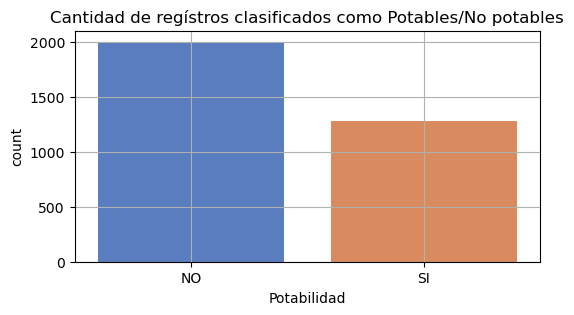

In [111]:
# Conteo de potabilidad y no potabilidad
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='Potabilidad', palette = 'muted')
plt.title('Cantidad de regístros clasificados como Potables/No potables')
plt.grid()
plt.show()

In [112]:
# Porcentaje de potabilidad
potabilidad = (df[['Potabilidad']].value_counts()/len(df))*100
potabilidad

Potabilidad
NO             60.989011
SI             39.010989
Name: count, dtype: float64

Debido a que deseamos asegurar que nuestros datos sean lo suficientemente apropiados para generar un modelo que capture la realidad de la clasificación del agua como potable o no pobale, vamos a realizar un pequeño preprocesamiento de nuestros datos de manera que generemos dos datasets nuevos que contenan una variable Potable balanceada. Concretamente, generaremos un dataset balanceado a partir de subsampleo y sobremuestreo mediante la técnica SMOTE.

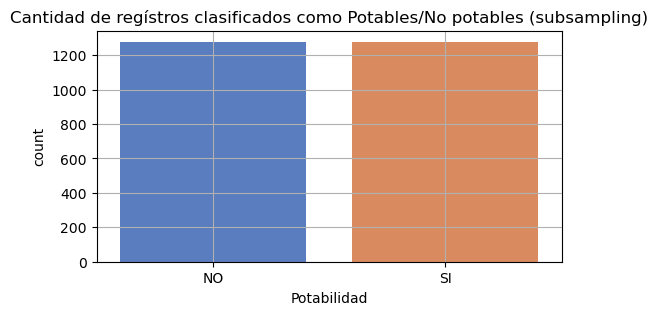

In [113]:
# Balanceo de los datos mediante submuestreo
random_seed = 77
sample_size = df['Potabilidad'].value_counts().values.min()
np.random.seed(77)

df_knn_no_enc = df_knn.drop(['Potabilidad'], axis=1)
df_knn_no_enc['Potabilidad'] = df['Potabilidad']

df_knn_sub = df_knn_no_enc.groupby('Potabilidad').apply(
    lambda x: x.sample(min( len(x), sample_size ), random_state = random_seed)
    ).reset_index(drop=True)


# Conteo de potabilidad y no potabilidad bajo el metodo de submuestreo
plt.figure(figsize=(6,3))
sns.countplot(data=df_knn_sub,x='Potabilidad', palette = 'muted')
plt.title('Cantidad de regístros clasificados como Potables/No potables (subsampling)')
plt.grid()
plt.show()

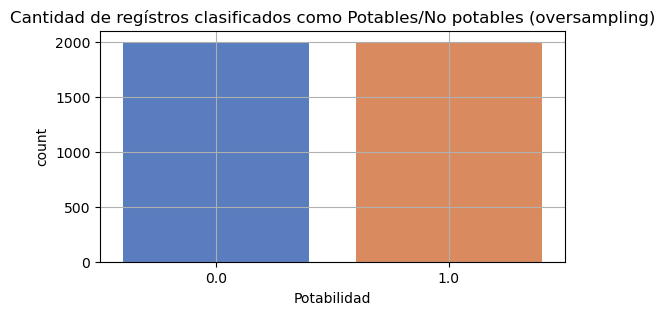

In [114]:
# Balanseo de los datos por metodo SMOTE
X = df_knn.drop(['Potabilidad'], axis=1)
y = df_knn['Potabilidad']

smote = SMOTE(sampling_strategy='auto', random_state=77)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_knn_over = pd.DataFrame(X_resampled, columns=X.columns)
df_knn_over['Potabilidad'] = y_resampled


# Conteo de potabilidad y no potabilidad bajo el metodo de submuestreo
plt.figure(figsize=(6,3))
sns.countplot(data=df_knn_over,x='Potabilidad', palette = 'muted')
plt.title('Cantidad de regístros clasificados como Potables/No potables (oversampling)')
plt.grid()
plt.show()

### <!-- Subsection 2.5 -->
**<h3 id="subsection25" style="color: rgb(42, 100, 109);">2.5. Análisis bivariado y de correlación</h3>**

---
Análisis bivariado y de correlación

---

Gracias a que nuestro dataset posee solo 9 variables, nos es posible realizar  una mayor cantidad de comparaciones entre variables sin perder fácilmente el control ni el enfoque del análisis exploratorio. En la presente sección exploraremos los datos en búsqueda de patrones de relación directa entre pares de variables bien sea en forma de correlación (linealidad) o, patrones no lineales como clusters.

Para empezar, creemos un dataframe imputado sin codificación dummies o onehot.

In [115]:
# Imputación de valores por medio del algoritmo KNN
df_knn_no_enc = df_knn.drop(['Potabilidad'], axis=1)
df_knn_no_enc['Potabilidad'] = df['Potabilidad']
df_knn_no_enc.head()

pH  Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  7.158  204.89  20791.32        7.30   368.520         564.31   
1  3.720  129.42  18630.06        6.64   336.094         592.89   
2  8.100  224.24  19909.54        9.28   330.450         418.61   
3  8.320  214.37  22018.42        8.06   356.890         363.27   
4  9.090  181.10  17978.99        6.55   310.140         398.41   

   Carbono_orgánico  Trihalometanos  Turbidez Potabilidad  
0             10.38           86.99      2.96          NO  
1             15.18           56.33      4.50          NO  
2             16.87           66.42      3.06          NO  
3             18.44          100.34      4.63          NO  
4             11.56           32.00      4.08          NO

Una vez tenemos de nuevo nuestra variable categórica para que podamos usarla como criterio de segmentación de datos, procedemos a realizar un pairplot que nos permita ver las relaciones bivariadas entre nuestras variables segmentadas por potabilidad.

<Figure size 1000x1000 with 0 Axes>

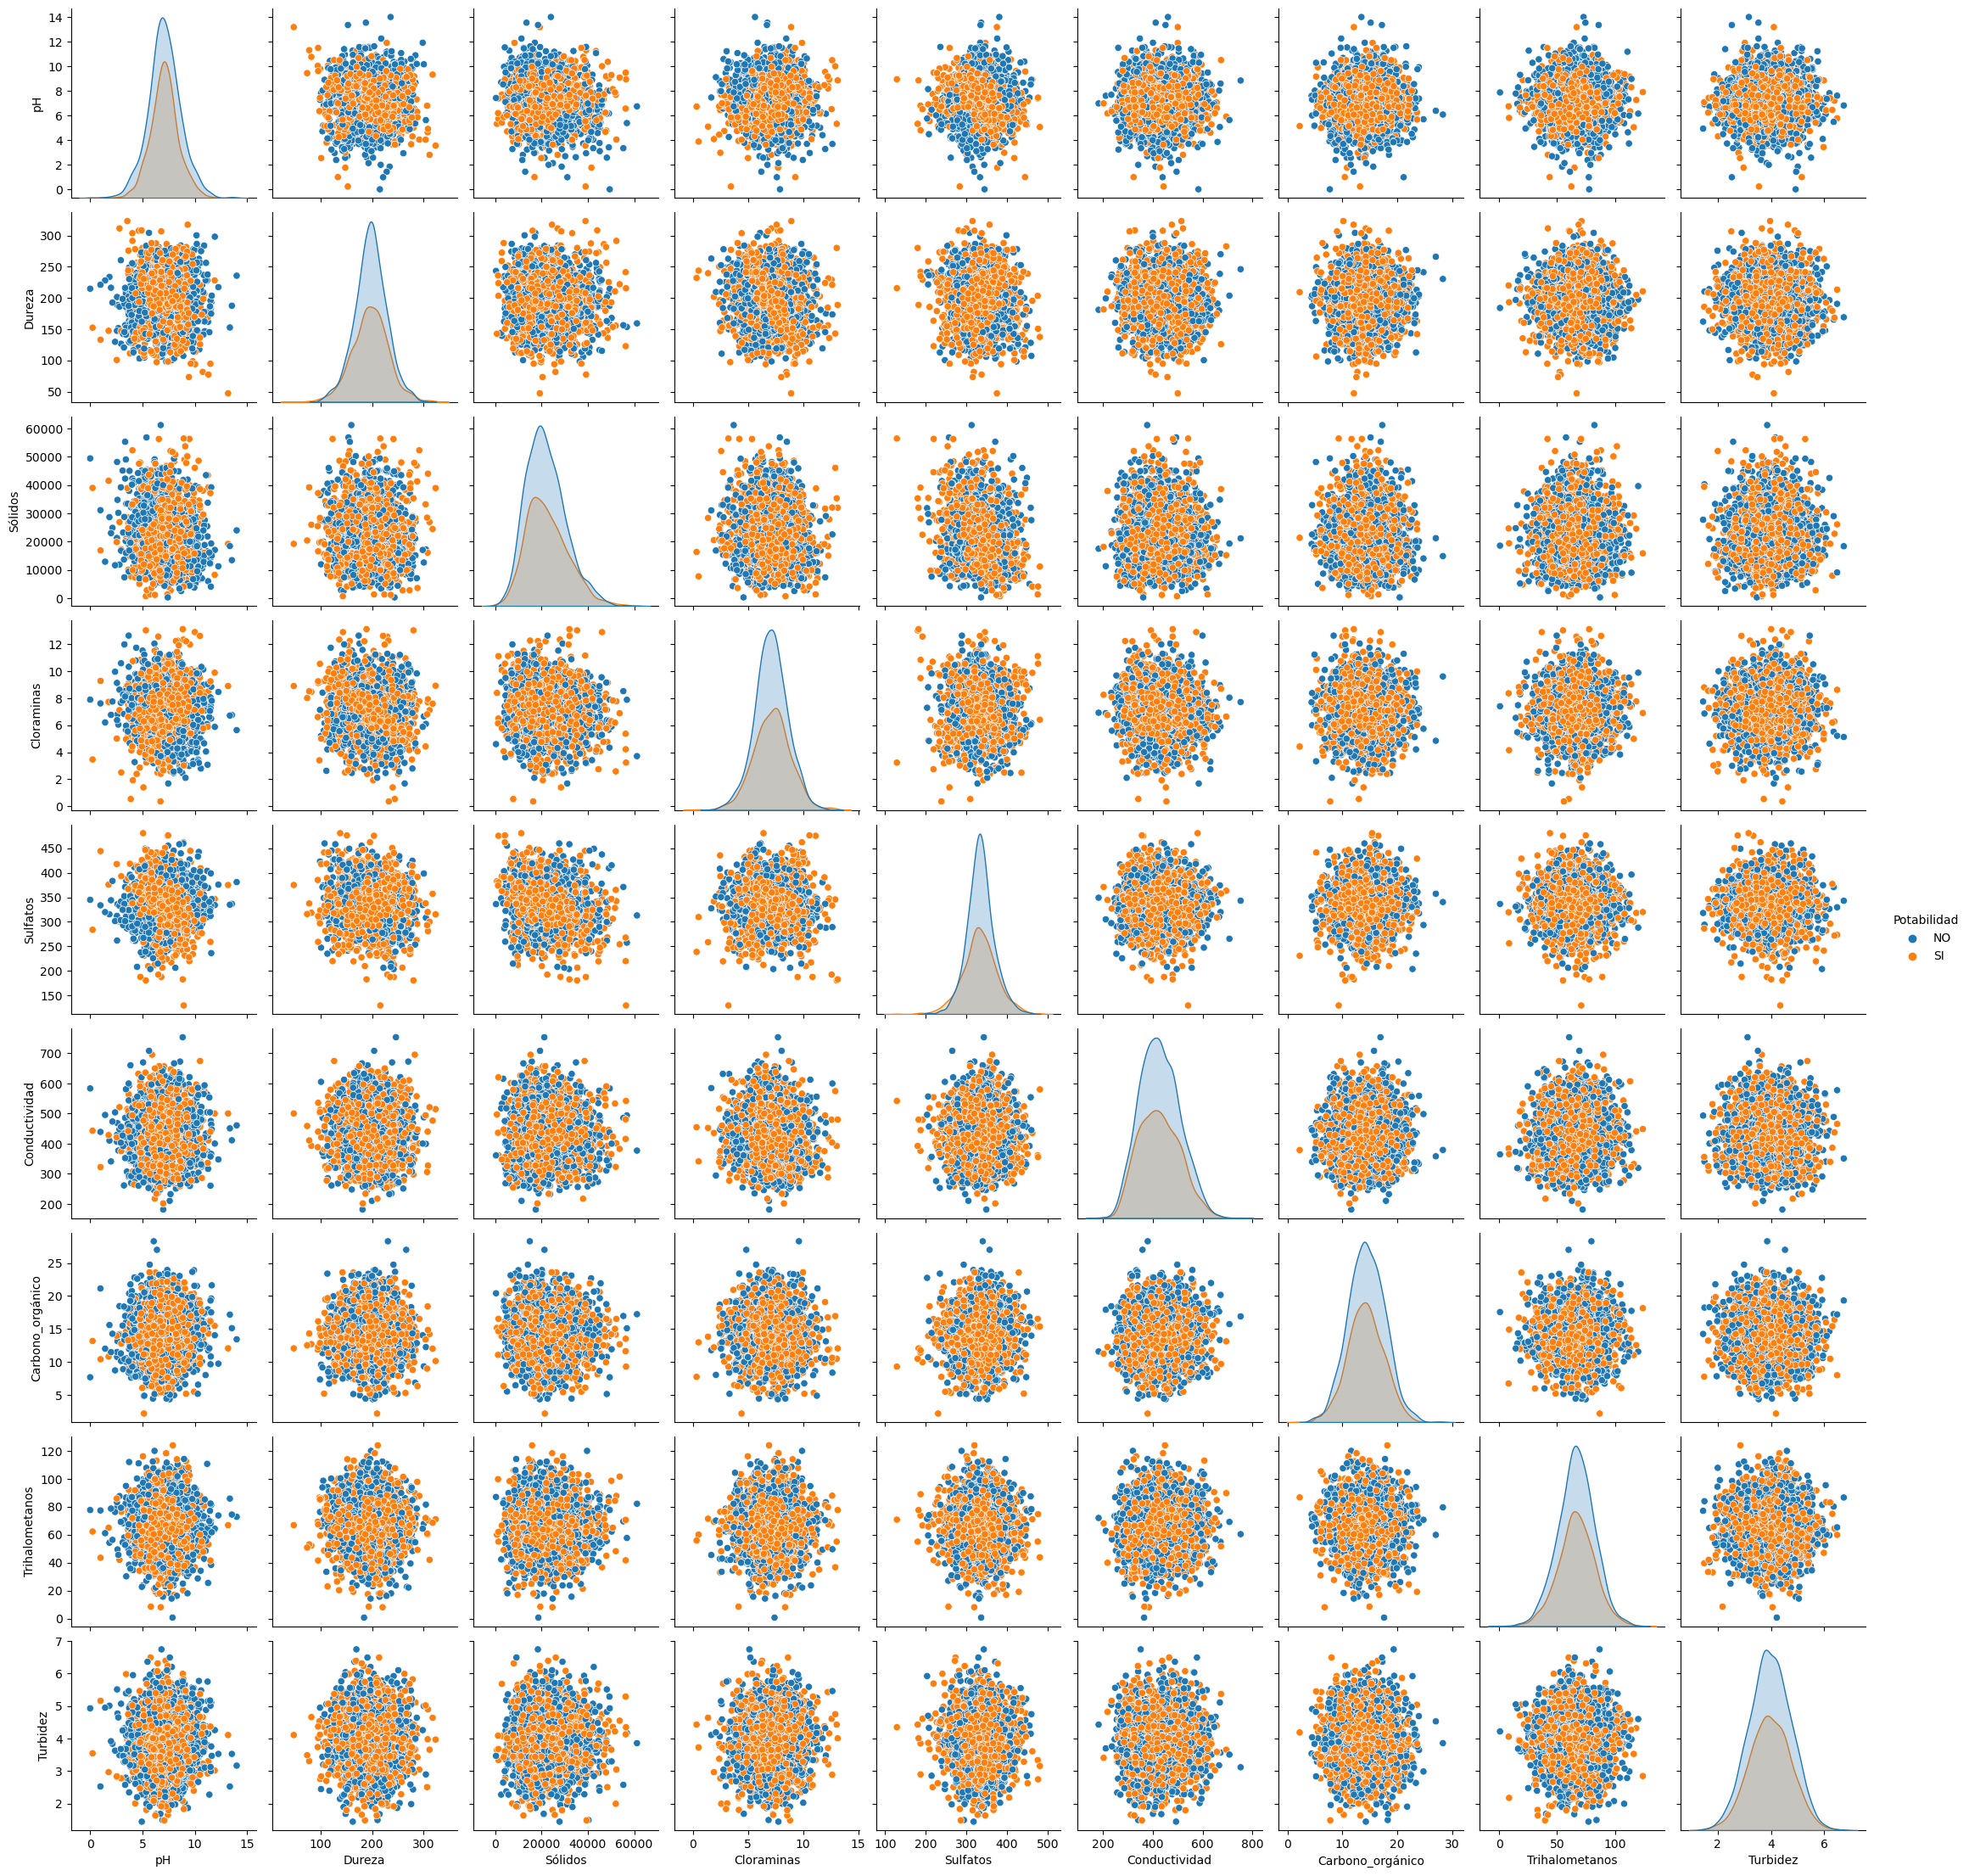

In [116]:
# Paiplot entre todas las variables usando la temporada como criterio de etiquetado
plt.figure(figsize=(10,10))
sns.pairplot(data=df_knn_no_enc, hue='Potabilidad', kind='scatter')
plt.show()

A partir de la observación del pairplot anterior, podemos hacernos una perspectiva general de como los posibles pares de variables expresan patrones dentro de los datos. Podemos observar lo siguiente:
* Ningún scatter plot entre variables refleja una relación lineal o de correlación, de hecho, cada scatter plot corresponde a un conjunto de datos que se comportan similarmente a una distribución normal bidimensional de data.
*Si observamos la diagonal del pairplot la cual nos permite ver las distribuciones de las variables, vemos que en todos los casos la distribución del agua potable es inferior a la distribución del agua no potable, lo que indica que según todas las variables, la mayor cantidad de muestras de agua corresponden a aguas no potables.

Para evidenciar cuantitativamente la falta de correlación o colinealidad entre las variables, veremos a continuación una matriz de calor que refleja el coeficiente de correlación de Pearson entre variables. Vemos que casi todos los valores son cercanos a cero.

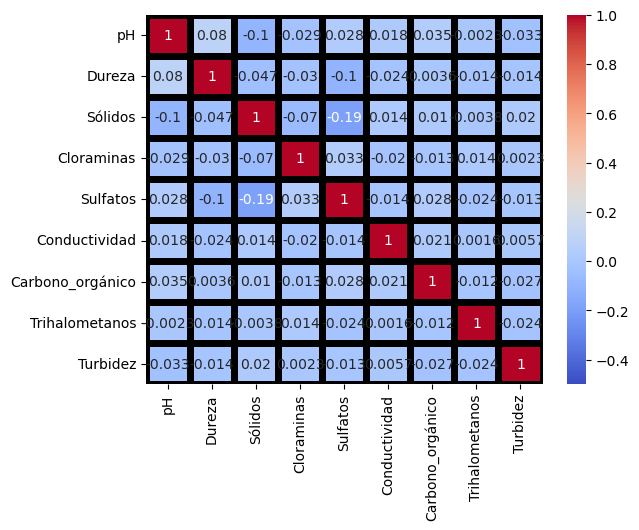

In [117]:
# Correlación entre variables
df_no_pot = df_knn.drop(['Potabilidad'],axis=1)
corr_mat = df_no_pot.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=5,
            linecolor='black', vmin=-0.5, vmax=1,
            cbar=True)
plt.show()

### <!-- Subsection 2.6 -->
**<h3 id="subsection26" style="color: rgb(42, 100, 109);">2.6. Análisis multivariado</h3>**

---
Análisis multivariado

---

El presente conjunto de datos no permite un análisis multivariado tradicional en donde podamos usar diferentes variables categóricas para realizar segmentaciones en los datos, ya que de por si solo tenemos una única variable categórica.

# <!-- Section 3 -->
**<h2 id="section3" style="color: rgb(71, 207, 228);">3. Escalamiento de los datos</h2>**

---
Escalamiento de los datos

---

Los métodos de escalamiento de los datos son técnicas fundamentales en el preprocesamiento de datos que buscan transformar las características de un conjunto de datos para mejorar el rendimiento y la interpretación de los modelos de análisis o aprendizaje automático. Estos métodos ajustan la escala de las variables para que todas tengan un rango comparable, lo que es especialmente útil en algoritmos que son sensibles a la magnitud de los datos. El escalamiento de los datos se vuelve necesario cuando las características tienen rangos de valores muy diferentes entre sí, como cuando una variable puede variar entre 0 y 1, mientras que otra puede oscilar entre cientos o miles. Este desbalance puede introducir sesgos no deseados en los algoritmos, afectando su capacidad de identificar patrones o tendencias relevantes.

Una de las razones escenciales por las que es necesario escalar los datos es que muchos algoritmos de machine learning, como la regresión logística, los algoritmos de clusterización o las redes neuronales, se basan en métricas de distancia o cálculos geométricos que asumen que todas las características tienen el mismo peso en el análisis. Si una característica tiene valores mucho más grandes que otra, dominará el cálculo de distancias o similares, lo que puede llevar a conclusiones incorrectas. Por ejemplo, en el caso de los modelos de clustering o de clasificación basados en distancias (como k-means o el k-vecinos más cercanos), la distancia entre puntos de datos depende directamente de las diferencias numéricas entre las variables. Sin escalamiento, una variable con mayor rango podría influir de manera desproporcionada en el resultado, distorsionando la clasificación o el agrupamiento final.

Existen diferentes métodos de escalamiento, cada uno adecuado para distintos escenarios siendo los más relevantes nombrados a continuación:

1. **Normalización (Min-Max Scaling)**: Este método ajusta los valores de las características para que se ubiquen dentro de un rango fijo, generalmente entre 0 y 1. Es útil cuando los datos siguen una distribución desconocida o no gaussiana, y es muy utilizado en redes neuronales, donde pequeñas diferencias en los valores iniciales pueden tener un gran impacto en el proceso de aprendizaje.
   
2. **Estandarización (Z-score Scaling)**: En este caso, se transforman los datos para que cada característica tenga media 0 y desviación estándar 1. Este enfoque es más robusto cuando los datos siguen una distribución gaussiana. Es común en algoritmos como los que utilizan el descenso de gradiente, como la regresión lineal y logística, porque garantiza que todas las características contribuyan de manera proporcional al cálculo de la función de costo.

3. **Escalamiento robusto (Robust Scaler)**: Esta técnica es especialmente útil cuando los datos contienen valores atípicos. A diferencia de la normalización o la estandarización, que pueden verse afectadas por los outliers, el escalamiento robusto utiliza medidas estadísticas robustas, como la mediana y el rango intercuartílico, para ajustar los valores, logrando así una mayor resistencia a la influencia de puntos extremos.

4. **Escalamiento logarítmico**: En este método, se aplica una transformación logarítmica a las características con distribuciones asimétricas o colas largas. Esto ayuda a reducir la asimetría y hace que los valores se distribuyan más uniformemente, facilitando la identificación de patrones más claros.

El escalamiento de los datos es especialmente útil para mejorar la eficiencia en algoritmos que implican la búsqueda de soluciones óptimas, como los que utilizan métodos iterativos. Sin escalamiento, los algoritmos pueden tardar más tiempo en converger o incluso quedarse atascados en soluciones subóptimas.


### <!-- Subsection 3.1 -->
**<h3 id="subsection31" style="color: rgb(42, 100, 109);">3.1. Min-Max Scaling</h3>**

---
Normalización (Min-Max Scaling)

---

El **método de escalamiento Min-Max** es una técnica de normalización que transforma los valores de una característica para que estén dentro de un rango específico, típicamente entre 0 y 1. Es uno de los métodos más simples y comunes para escalar datos, y se utiliza con frecuencia en situaciones donde el rango de los datos tiene importancia para la interpretación o cuando se desea igualar las escalas de las variables antes de aplicarlas a algoritmos sensibles a la magnitud.

El proceso de escalamiento Min-Max se basa en la siguiente fórmula matemática:

$$
X_{\text{escalado}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Donde:
- $ X $ es el valor original de la característica.
- $ X_{\text{min}} $ es el valor mínimo de la característica.
- $ X_{\text{max}} $ es el valor máximo de la característica.
- $ X_{\text{escalado}} $ es el valor resultante después de aplicar el escalamiento, que estará en el rango [0, 1].

De esta manera, el valor más bajo de la característica será transformado en 0 y el valor más alto será convertido en 1, con todos los valores intermedios ajustados proporcionalmente entre estos dos extremos. También es posible ajustar el rango para que los valores estén entre un mínimo y máximo diferente, por ejemplo, entre -1 y 1. La fórmula general para escalar un valor $X$ dentro de cualquier rango $[a, b]$ es:

$$
X_{\text{escalado}} = a + \frac{(X - X_{\text{min}})(b - a)}{X_{\text{max}} - X_{\text{min}}}
$$

Donde:
- $X_{\text{escalado}}$ es el valor escalado.
- $X$ es el valor original.
- $X_{\text{min}}$ es el valor mínimo del conjunto de datos.
- $X_{\text{max}}$ es el valor máximo del conjunto de datos.
- $a$ es el límite inferior del nuevo rango (en este caso, -1).
- $b$ es el límite superior del nuevo rango (en este caso, 1).

### **Ventajas del escalamiento Min-Max**

1. **Simplicidad**: El método es fácil de implementar y computacionalmente eficiente, lo que lo hace adecuado para grandes volúmenes de datos y aplicaciones donde el rendimiento es crítico.
   
2. **Mantiene la relación entre los valores originales**: A diferencia de otros métodos de escalamiento, el Min-Max conserva las relaciones relativas entre los valores originales. Esto puede ser útil cuando la distribución de los datos es importante para la interpretación.

3. **Ajuste a un rango predefinido**: Al ajustar los valores dentro de un rango definido, como $[0, 1]$, facilita la interpretación en casos específicos, como algoritmos basados en redes neuronales, donde los valores de entrada deben estar dentro de un rango reducido para acelerar el proceso de aprendizaje.

4. **Utilización en modelos basados en distancia**: Es especialmente beneficioso en algoritmos que dependen de cálculos de distancia, como **K-means clustering** o **K-nearest neighbors (K-NN)**, ya que evita que las características con grandes rangos dominen a otras con rangos más pequeños.

### **Desventajas del escalamiento Min-Max**

1. **Sensibilidad a outliers**: Uno de los principales inconvenientes de este método es que es extremadamente sensible a valores atípicos (outliers). Si los datos contienen un outlier extremo, afectará los valores mínimo y máximo, lo que distorsionará el rango completo y puede hacer que los valores intermedios estén desbalanceados o comprimidos. Por ejemplo, si una variable tiene un valor mínimo de 0, un valor máximo de 100, pero también tiene un outlier en 10,000, la mayoría de los datos serán transformados a valores cercanos a 0.

2. **No garantiza una distribución normal**: Aunque el Min-Max ajusta los valores a un rango uniforme, no transforma la distribución subyacente de los datos. Si los datos originales no siguen una distribución normal o uniforme, los valores escalados seguirán mostrando la misma forma de distribución, lo que puede no ser adecuado para ciertos algoritmos que asumen normalidad en los datos, como la regresión logística.

3. **Dependencia en el rango de datos originales**: El escalamiento Min-Max se basa en el mínimo y máximo del conjunto de datos disponibles. Si en un entorno productivo o en tiempo real aparecen nuevos valores fuera de ese rango, es necesario recalcular el escalamiento, lo que puede no ser eficiente ni práctico. Esto es particularmente problemático en aplicaciones donde se incorporan datos nuevos de forma continua.

4. **No ofrece robustez contra distribuciones no homogéneas**: Si los datos tienen diferentes rangos de valores en diferentes subconjuntos, el escalamiento Min-Max puede no manejar bien estas diferencias, ya que simplemente ajusta todo al mismo rango, lo que no siempre es óptimo en situaciones de heterogeneidad.

In [118]:
# Importación del Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

# Separamos los datos X (todas las columnas excepto 'Potabilidad') y la variable objetivo y ('Potabilidad')
X = df_knn_over.drop(columns=['Potabilidad'])
y = df_knn_over['Potabilidad']

# Escalamiento en el rango [0, 1]
scaler_0_1 = MinMaxScaler(feature_range=(0, 1))
scaled_data_0_1 = scaler_0_1.fit_transform(X)

# Escalamiento en el rango [-1, 1]
scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
scaled_data_neg1_1 = scaler_neg1_1.fit_transform(X)

# Crear DataFrames para los datos escalados
df_scaled_0_1 = pd.DataFrame(scaled_data_0_1, columns=X.columns)
df_scaled_neg1_1 = pd.DataFrame(scaled_data_neg1_1, columns=X.columns)

# Añadir de vuelta la columna 'Potabilidad' sin escalar
df_scaled_0_1['Potabilidad'] = y.values
df_scaled_neg1_1['Potabilidad'] = y.values

# Mostrar los resultados
print("Escalamiento en el rango [0, 1]:\n", df_scaled_0_1.head())
print("\nEscalamiento en el rango [-1, 1]:\n", df_scaled_neg1_1.head())


Escalamiento en el rango [0, 1]:
          pH    Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  0.511286  0.571149  0.336096    0.543818  0.680397       0.669447   
1  0.265714  0.297399  0.300611    0.492175  0.588285       0.719424   
2  0.578571  0.641336  0.321619    0.698748  0.572252       0.414664   
3  0.594286  0.605535  0.356244    0.603286  0.647360       0.317892   
4  0.649286  0.484856  0.289922    0.485133  0.514558       0.379341   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad  
0          0.313410        0.699740  0.285444          0.0  
1          0.497318        0.450998  0.576560          0.0  
2          0.562069        0.532857  0.304348          0.0  
3          0.622222        0.808048  0.601134          0.0  
4          0.358621        0.253610  0.497164          0.0  

Escalamiento en el rango [-1, 1]:
          pH    Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  0.022571  0.142298 -0.327807    0.087637  0.360793      

### <!-- Subsection 3.2 -->
**<h3 id="subsection32" style="color: rgb(42, 100, 109);">3.2. Standard Scaling</h3>**

---
Estandarización (Z-score Scaling)

---

El **método de estandarización** es una técnica de preprocesamiento que transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es una herramienta muy usada en el análisis exploratorio de datos, especialmente cuando los datos presentan diferentes escalas y distribuciones. Este método resulta útil en modelos que son sensibles a la magnitud de las características, como los algoritmos basados en distancia (tales como **K-means**, **K-nearest neighbors**), o cuando es necesario que los datos sigan una distribución normal estándar.

El proceso de estandarización se realiza utilizando la siguiente fórmula matemática:

$$
X_{\text{estandarizado}} = \frac{X - \mu}{\sigma}
$$

Donde:
- $ X $ es el valor original de la característica.
- $ \mu $ es la media de la característica.
- $ \sigma $ es la desviación estándar de la característica.
- $ X_{\text{estandarizado}} $ es el valor resultante después de aplicar la estandarización.

El resultado es que los datos quedan centrados en torno a una media de 0, con una desviación estándar igual a 1, lo que los hace más adecuados para muchos algoritmos que requieren datos normalizados o distribuidos simétricamente.

### **Ventajas de la estandarización**

1. **Escalado semi robusto**: La estandarización es menos sensible a valores atípicos (outliers) que el escalado Min-Max, ya que se basa en la media y la desviación estándar, lo que suaviza el impacto de los valores extremos, siempre que no sean extremadamente influyentes.
   
2. **Adecuado para distribuciones no uniformes**: A diferencia del escalamiento Min-Max, la estandarización ajusta los datos a una escala que puede ser útil incluso si los datos no siguen una distribución uniforme, ya que centra los datos en torno a la media, lo que permite que características con diferentes rangos se procesen de manera más equilibrada.

3. **Ideal para algoritmos basados en distancia**: Este método es útil en algoritmos que dependen de cálculos de distancia, como **SVM** o **regresión logística**, ya que estos algoritmos pueden asumir que los datos están distribuidos normalmente o requieren que las características tengan la misma escala. En conjuntos de datos con una gran variabilidad en los valores de las características, la estandarización permite que cada característica contribuya de manera equitativa al análisis, sin que aquellas con valores más altos dominen el comportamiento del modelo.

### **Desventajas de la estandarización**

1. **No limita los valores a un rango fijo**: A diferencia del escalado Min-Max, la estandarización no restringe los valores dentro de un rango específico como $[0, 1]$ o $[-1, 1]$. Esto puede hacer que sea más difícil interpretar los resultados en ciertos contextos o cuando se trabaja con modelos que prefieren entradas limitadas.

2. **Sensibilidad a valores atípicos extremos**: Aunque es menos sensible a outliers que el Min-Max, la estandarización puede seguir viéndose afectada por valores atípicos extremos, ya que estos influyen en la media y la desviación estándar, distorsionando el escalado en presencia de datos muy extremos.

3. **Asume una distribución aproximadamente normal**: Aunque no requiere una distribución exactamente normal, la estandarización asume que los datos están distribuidos de forma aproximadamente normal, lo que puede no ser cierto en algunos conjuntos de datos. Si los datos están muy sesgados o presentan distribuciones complejas, este método puede no ser el más adecuado.

4. **Dependencia en la desviación estándar de los datos**: Si los datos tienen una desviación estándar muy baja (por ejemplo, si están muy concentrados en torno a un valor), la estandarización puede generar valores extremadamente grandes o pequeños, lo que puede complicar el análisis.


In [119]:
# Importación de un escalador tipo estantarizador
from sklearn.preprocessing import StandardScaler

# Separamos los datos X (todas las columnas excepto 'Potabilidad') y la variable objetivo y ('Potabilidad')
X = df_knn_over.drop(columns=['Potabilidad'])
y = df_knn_over['Potabilidad']

# Inicializamos el escalador estándar
scaler = StandardScaler()

# Aplicamos la estandarización a las características
X_scaled = scaler.fit_transform(X)

# Convertimos el array estandarizado de nuevo a un DataFrame, manteniendo los nombres de las columnas originales
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Volvemos a incluir la columna 'Potabilidad' en el DataFrame estandarizado
df_knn_over_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Visualizamos las primeras filas del DataFrame estandarizado
print(df_knn_over_scaled.head())


         pH    Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  0.061636  0.270279 -0.150402    0.111809  0.941836       1.757231   
1 -2.347205 -2.079469 -0.393841   -0.316257  0.079635       2.119331   
2  0.721650  0.872739 -0.249723    1.396005 -0.070438      -0.088746   
3  0.875794  0.565438 -0.012185    0.604732  0.632597      -0.789888   
4  1.415296 -0.470419 -0.467175   -0.374629 -0.610477      -0.344674   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad  
0         -1.219240        1.325724 -1.326990          0.0  
1          0.290166       -0.661581  0.717779          0.0  
2          0.821602       -0.007572 -1.194213          0.0  
3          1.315303        2.191037  0.890389          0.0  
4         -0.848178       -2.238590  0.160115          0.0  


### <!-- Subsection 3.3 -->
**<h3 id="subsection33" style="color: rgb(42, 100, 109);">3.3. Robust Scaling</h3>**

---
Escalado Robust (Robust Scaler)

---

El **método de escalado robusto** es una técnica de preprocesamiento de datos diseñada para mitigar el impacto de valores atípicos (outliers). A diferencia de la estandarización tradicional, que utiliza la media y la desviación estándar, el escalado robusto utiliza la mediana y los rangos intercuartílicos (IQR), lo que lo hace menos sensible a outliers extremos. Esto es útil cuando se tienen datos con distribuciones sesgadas o con valores atípicos que podrían distorsionar los resultados al aplicar otros métodos de escalado.

El escalado robusto transforma los datos utilizando la siguiente fórmula matemática:

$$
X_{\text{escalado}} = \frac{X - \text{mediana}(X)}{\text{IQR}(X)}
$$

Donde:
- $X$ es el valor original de la característica.
- $\text{mediana}(X)$ es la mediana de la característica.
- $\text{IQR}(X)$ es el rango intercuartílico de la característica, que se calcula como el valor del tercer cuartil (Q3) menos el valor del primer cuartil (Q1).
- $X_{\text{escalado}}$ es el valor resultante después de aplicar el escalado robusto.

Este enfoque asegura que los valores de las características se centren alrededor de la mediana y que las características estén distribuidas en función de su rango intercuartílico, lo que evita que los outliers influyan significativamente en la transformación.

### **Ventajas del escalado robusto**

1. **Robustez frente a outliers**: La principal ventaja de este método es su resistencia a los valores atípicos, ya que se basa en la mediana y el IQR, en lugar de la media y la desviación estándar, que son más sensibles a outliers extremos. Esto lo convierte en una buena opción cuando se trabaja con conjuntos de datos que contienen valores atípicos significativos.

2. **Distribución no normal**: A diferencia de la estandarización, el escalado robusto no asume que los datos sigan una distribución normal. Esto lo hace útil para conjuntos de datos con distribuciones no simétricas o que presentan sesgos importantes.

3. **Adecuado para características con rangos heterogéneos**: Este método permite que las características con diferentes escalas o distribuciones se ajusten de manera más uniforme, lo que es beneficioso en modelos que dependen de la relación entre las características, como los algoritmos basados en distancia.

4. **Aplicable en entornos productivos**: Una vez que los valores intercuartílicos se calculan, el escalado robusto puede aplicarse sin necesidad de recalibración constante, incluso en escenarios de datos en tiempo real o en producción.

### **Desventajas del escalado robusto**

1. **No restringe los valores a un rango específico**: Al igual que la estandarización, el escalado robusto no limita los valores transformados dentro de un rango predefinido como $[0, 1]$ o $[-1, 1]$. Esto puede dificultar la interpretación de los resultados o no ser adecuado para ciertos algoritmos que prefieren entradas con límites fijos.

2. **No mantiene las relaciones originales**: Dado que se basa en la mediana y el rango intercuartílico, el escalado robusto puede distorsionar las relaciones lineales entre los valores originales, lo que no siempre es deseable, especialmente en problemas donde la estructura original de los datos es importante.

3. **Menor precisión en distribuciones sin outliers**: Si el conjunto de datos no contiene valores atípicos significativos o tiene una distribución normal bien ajustada, el escalado robusto puede no ofrecer ventajas sobre la estandarización tradicional y puede perder precisión al representar los datos.


In [120]:
# Importación de un escalador tipo estantarizador robusto
from sklearn.preprocessing import RobustScaler

# Separamos los datos X (todas las columnas excepto 'Potabilidad') y la variable objetivo y ('Potabilidad')
X = df_knn_over.drop(columns=['Potabilidad'])
y = df_knn_over['Potabilidad']

# Inicializamos el escalador robusto
scaler = RobustScaler()

# Aplicamos el escalado robusto a las características
X_scaled = scaler.fit_transform(X)

# Convertimos el array escalado de nuevo a un DataFrame, manteniendo los nombres de las columnas originales
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Volvemos a incluir la columna 'Potabilidad' en el DataFrame escalado
df_knn_over_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Visualizamos las primeras filas del DataFrame escalado
print(df_knn_over_scaled.head())

         pH    Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  0.063473  0.205963 -0.022141    0.082474  0.812613       1.275877   
1 -1.995210 -1.721382 -0.206193   -0.257732  0.064358       1.530892   
2  0.627545  0.700121 -0.097233    1.103093 -0.065881      -0.024181   
3  0.759281  0.448062  0.082358    0.474227  0.544242      -0.517971   
4  1.220359 -0.401583 -0.261638   -0.304124 -0.534550      -0.204422   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad  
0         -0.909085        1.041493 -0.970297          0.0  
1          0.234809       -0.529973  0.554455          0.0  
2          0.637554       -0.012814 -0.871287          0.0  
3          1.011703        1.725742  0.683168          0.0  
4         -0.627878       -1.776997  0.138614          0.0  


### <!-- Subsection 3.4 -->
**<h3 id="subsection34" style="color: rgb(42, 100, 109);">3.4. Robust Scaling</h3>**

---
Escalado Logarítmico (Logarithmic Scaling)

---

El **escalado logarítmico** es una técnica de preprocesamiento de datos utilizada para transformar características con distribuciones altamente asimétricas o sesgadas, especialmente cuando se tienen valores que varían en varios órdenes de magnitud. Al aplicar una transformación logarítmica, los datos se "comprimen" en un rango más manejable, lo que reduce la influencia de los valores extremadamente grandes y permite un análisis más equilibrado de las características. Este tipo de transformación es especialmente útil cuando las características presentan una distribución sesgada hacia la derecha o cuando hay valores que crecen exponencialmente.

La transformación logarítmica se realiza utilizando la siguiente fórmula:

$$
X_{\text{log}} = \log(X + \epsilon)
$$

Donde:
- $X$ es el valor original de la característica.
- $X_{\text{log}}$ es el valor resultante después de aplicar la transformación logarítmica.
- $\log$ es la función logarítmica.
- $\epsilon$ es un valor muy pequeño (generalmente cercano a $1e^{-7}$ o $1$) que se añade para evitar problemas cuando $X = 0$.

### ¿Cuándo utilizar el escalado logarítmico?

1. **Distribuciones con sesgo a la derecha**: Si los datos presentan una distribución con una cola larga hacia valores altos, la transformación logarítmica puede reducir la influencia de esos valores extremos, haciendo que la distribución sea más simétrica.

2. **Escalas exponenciales o altamente variables**: El escalado logarítmico es útil cuando los datos varían en varios órdenes de magnitud. Al comprimir los valores grandes de forma significativa y reducir la distancia entre ellos, los modelos de machine learning pueden manejar mejor las diferencias entre las características.

3. **Datos positivos con valores atípicos grandes**: Dado que los logaritmos sólo están definidos para valores positivos, esta transformación es ideal para datos que no contengan valores negativos o cercanos a cero, pero que presenten valores atípicos muy grandes.

4. **Datos con crecimiento exponencial**: Si los datos crecen exponencialmente (como ingresos de una empresa, conteos de usuarios, crecimiento poblacional, etc.), la transformación logarítmica ayuda a linealizar la relación entre los datos, facilitando su análisis en modelos lineales o basados en distancia.

### **Ventajas del escalado logarítmico**

1. **Reducción de la influencia de outliers**: La transformación logarítmica comprime los valores altos, lo que reduce el efecto de los outliers extremos en los modelos y hace que las características sean más equilibradas para su análisis.

2. **Mejor manejo de datos en varias escalas**: Cuando las características tienen rangos extremadamente amplios, la transformación logarítmica permite que los modelos de machine learning procesen mejor las diferencias entre ellas, evitando que las características más grandes dominen a las más pequeñas.

3. **Linealización de relaciones no lineales**: En algunos casos, la relación entre las características no es lineal, pero al aplicar una transformación logarítmica, es posible convertir una relación no lineal en una lineal, mejorando así el rendimiento de modelos lineales.

4. **Adecuado para distribuciones sesgadas**: La transformación logarítmica puede mejorar la simetría de las distribuciones con sesgo positivo (a la derecha), ayudando a que los datos se comporten de manera más cercana a una distribución normal.

### **Desventajas del escalado logarítmico**

1. **No aplicable a valores negativos o cero**: Los logaritmos no están definidos para valores negativos o cero, por lo que esta transformación no puede aplicarse directamente a características que contengan estos valores. En su lugar, es común añadir un valor $\epsilon$ para asegurar que todos los valores sean positivos antes de la transformación.

2. **No adecuado para datos ya simétricos**: Si los datos ya tienen una distribución aproximadamente normal o simétrica, aplicar una transformación logarítmica puede distorsionar la distribución, afectando negativamente el rendimiento del modelo.

3. **Dificultad de interpretación**: Después de aplicar la transformación logarítmica, los valores ya no corresponden directamente a las magnitudes originales, lo que puede hacer que la interpretación de los resultados sea más compleja, especialmente cuando se presentan los resultados finales a usuarios no técnicos.


In [121]:
# Escalamiento Logarítmico
X = df_knn_over.drop(columns=['Potabilidad'])
y = df_knn_over['Potabilidad']

# Aplicamos la transformación logarítmica a las características, añadiendo un pequeño valor epsilon para evitar log(0)
epsilon = 1e-7
X_log_scaled = np.log(X + epsilon)

# Convertimos el array transformado de nuevo a un DataFrame, manteniendo los nombres de las columnas originales
X_log_scaled_df = pd.DataFrame(X_log_scaled, columns=X.columns)

# Volvemos a incluir la columna 'Potabilidad' en el DataFrame transformado
df_knn_over_log_scaled = pd.concat([X_log_scaled_df, y.reset_index(drop=True)], axis=1)

# Visualizamos las primeras filas del DataFrame escalado logarítmicamente
print(df_knn_over_log_scaled.head())

         pH    Dureza   Sólidos  Cloraminas  Sulfatos  Conductividad  \
0  1.968231  5.322473  9.942291    1.987874  5.909495       6.335604   
1  1.313724  4.863063  9.832532    1.893112  5.817391       6.385009   
2  2.091864  5.412717  9.898954    2.227862  5.800455       6.036940   
3  2.118662  5.367703  9.999635    2.086914  5.877428       5.895146   
4  2.207175  5.199049  9.796959    1.879465  5.737024       5.987482   

   Carbono_orgánico  Trihalometanos  Turbidez  Potabilidad  
0          2.339881        4.465793  1.085189          0.0  
1          2.719979        4.031227  1.504077          0.0  
2          2.825537        4.195998  1.118415          0.0  
3          2.914522        4.608564  1.532557          0.0  
4          2.447551        3.465736  1.406097          0.0  


**<h2 style="color: rgb(71, 207, 228);">Créditos</h2>**

---

**Docente:** Nicolás Castillo Ojeda

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Inteligencia Artificial - Cohorte I - 2025*


---